In [1]:
import numpy as np
import pandas as pd
from pandas.core.dtypes.common import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

################################

# PART-A

################################

## 1. Data Understanding & Exploration

### A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [2]:
car_name_data=pd.read_csv('Car name.csv')
car_name_data.head()

car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino

In [3]:
car_name_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Car name has 398 data entries and 1 column i.e. 'car_name'

### B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [4]:
car_attrib=pd.read_json('Car-Attributes.json')
car_attrib_col_dict={'cyl':'cylinders','disp':'displacement','hp':'horsepower','wt':'weight','acc':'acceleration','yr':'model_year'}
car_attrib.rename(columns=car_attrib_col_dict, inplace=True)
car_attrib.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1

In [5]:
car_attrib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


Car-Attributes has 398 data entires and 8 columns.

### C. Merge both the DataFrames together to form a single DataFrame

In [6]:
car_data=pd.concat([car_attrib,car_name_data],axis=1)
car_data.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Merged dataset contains 398 entries and 9 columns.

### D. Print 5 point summary of the numerical features and share insights.

In [8]:
car_data.describe().T

count         mean         std     min       25%     50%  \
mpg           398.0    23.514573    7.815984     9.0    17.500    23.0   
cylinders     398.0     5.454774    1.701004     3.0     4.000     4.0   
displacement  398.0   193.425879  104.269838    68.0   104.250   148.5   
weight        398.0  2970.424623  846.841774  1613.0  2223.750  2803.5   
acceleration  398.0    15.568090    2.757689     8.0    13.825    15.5   
model_year    398.0    76.010050    3.697627    70.0    73.000    76.0   
origin        398.0     1.572864    0.802055     1.0     1.000     1.0   

                   75%     max  
mpg             29.000    46.6  
cylinders        8.000     8.0  
displacement   262.000   455.0  
weight        3608.000  5140.0  
acceleration    17.175    24.8  
model_year      79.000    82.0  
origin           2.000     3.0

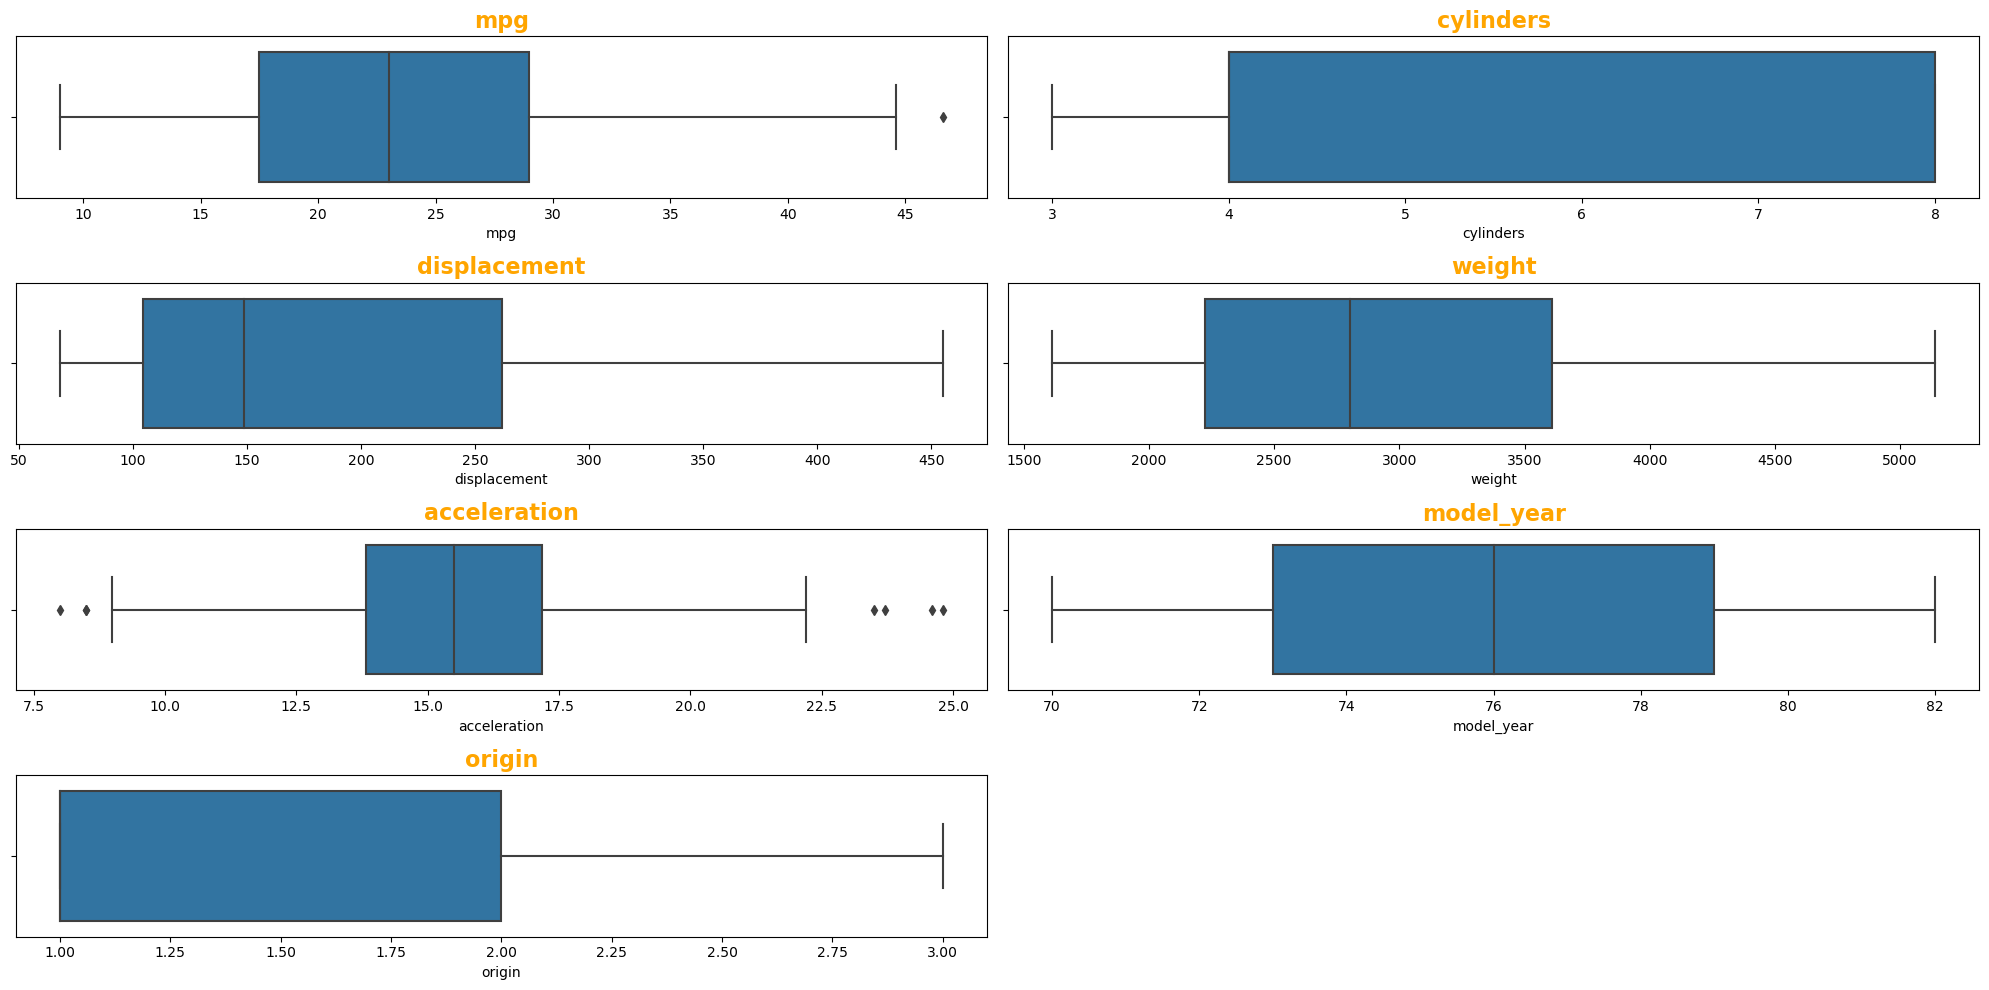

In [9]:
numerical_col=[i for i in car_data.columns if is_numeric_dtype(car_data[i])]
fig=plt.figure(figsize=(20,10))
for i in range(0,len(numerical_col)):
   ax=fig.add_subplot(4,2,i+1)
   sns.boxplot(data=car_data, x=numerical_col[i])
   ax.set_title(numerical_col[i],color='orange',weight='bold',fontsize=16)
plt.tight_layout()
plt.show()

Summarizing features:
1. Feature 'horsepower' data description is 'continuous', so need to analyse the data for incorrect data.
2. Feature 'mpg' has 1 outlier at right side of whisker with value as 46.6.
3. Feature 'acceleration' have 4 outliers at right side of whisker with value as 23.5, 23.7, 24.6 and 24.8, and 2 outliers at left side of whisker with value as 8.5 and 8.
4. Other features have no outliers.

## 2. Data Preparation & Analysis

### A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [10]:
# To check the missing data percentage
car_data.isnull().mean()*100

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
model_year      0.0
origin          0.0
car_name        0.0
dtype: float64

In [11]:
(car_data.isnull().sum()/car_data.shape[0])*100

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
model_year      0.0
origin          0.0
car_name        0.0
dtype: float64

No missing data found, that's why 0%.

### B. Check for duplicate values in the data and impute with the best suitable approach.

In [12]:
car_data[car_data.duplicated()]

Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, car_name]
Index: []

No duplicates found in the dataset.

### C. Plot a pairplot for all features.

<Figure size 2000x1000 with 0 Axes>

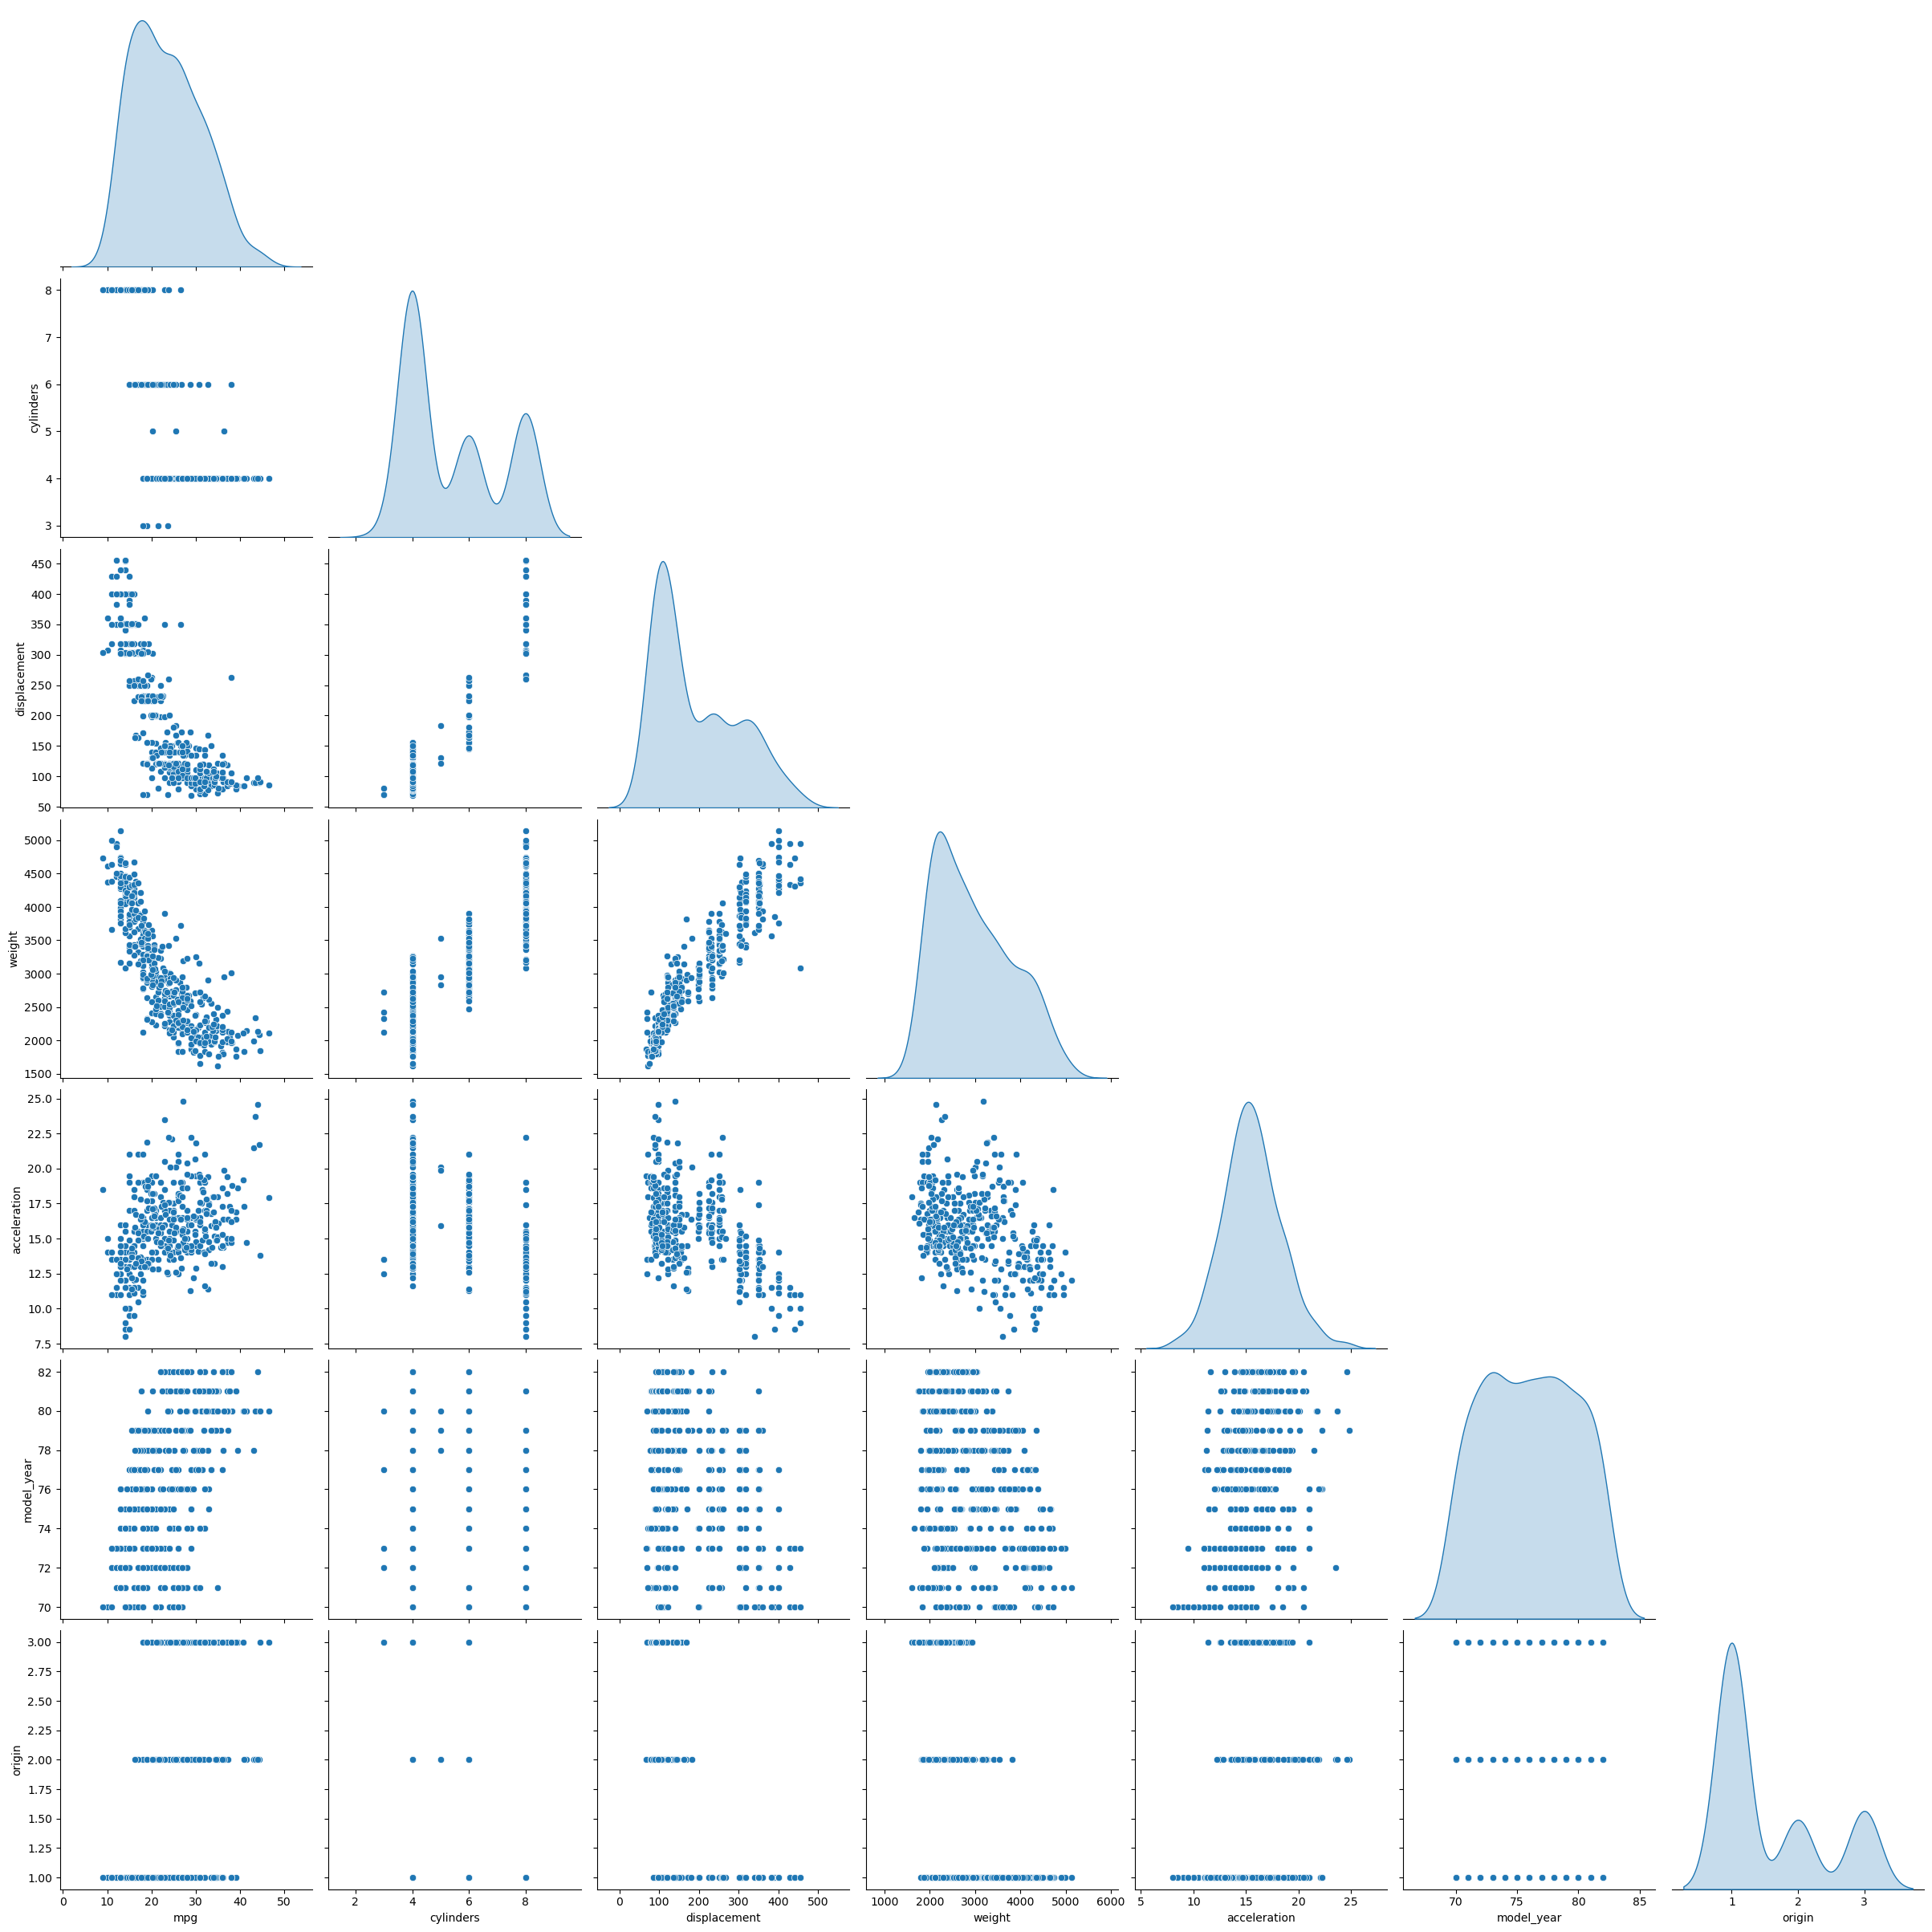

In [13]:
plt.figure(figsize=(20,10))
sns.pairplot(car_data, corner=True, size=3.5, diag_kind='kde')
plt.show();

Summarizing above plot:
1. There is strong positive correlation between, cylinders and displacement(95%), displacement and weight(93%) and cylinders and weight(89%).
2. There is strong negative correlation between, mpg and weight(83%), mpg and displacement(80%) and mpg and cylinders(77%).

### D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’.
### E. Share insights for Q2.d.

In [14]:
fig=px.scatter(car_data, x='weight', y='displacement', color='cylinders', title='Weight vs Displacement with Cylinders as bifurcation', trendline='ols')
fig.show()

Correlation is clearly noticeable as strongly correlated with 93% as positive correlation. Also groups can be identified as per cylinders.

### F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.
### G. Share insights for Q2.f.

In [15]:
fig=px.scatter(car_data, x='weight', y='mpg', color='cylinders', title='Weight vs MPG with Cylinders as bifurcation', trendline='ols')
fig.show()

Correlation is clearly noticeable as strongly correlated with 83% as negative correlation. Also groups can be identified as per cylinders.

### H. Check for unexpected values in all the features and datapoints with such values.

In [16]:
print('Duplicates or null values available.' if car_data.isnull().sum().any() and car_data.duplicated().any() else 'No Duplicates or null values available.')

No Duplicates or null values available.


In [17]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


As interpreted from above checks, there are no null/duplicates values present for numerical Dtype.
Need to check for object as Dtype, where car_name is string type so can be ignored, will check for horsepower.

In [18]:
hpIsDigit=pd.DataFrame(car_data.horsepower.str.isdigit())
car_data[hpIsDigit.horsepower==False]

mpg  cylinders  displacement horsepower  weight  acceleration  \
32   25.0          4          98.0          ?    2046          19.0   
126  21.0          6         200.0          ?    2875          17.0   
330  40.9          4          85.0          ?    1835          17.3   
336  23.6          4         140.0          ?    2905          14.3   
354  34.5          4         100.0          ?    2320          15.8   
374  23.0          4         151.0          ?    3035          20.5   

     model_year  origin              car_name  
32           71       1            ford pinto  
126          74       1         ford maverick  
330          80       2  renault lecar deluxe  
336          80       1    ford mustang cobra  
354          81       2           renault 18i  
374          82       1        amc concord dl

In [19]:
car_data=car_data.replace('?', np.nan)
car_data[hpIsDigit.horsepower==False]

mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin              car_name  
32           71       1            ford pinto  
126          74       1         ford maverick  
330          80       2  renault lecar deluxe  
336          80       1    ford mustang cobra  
354          81       2           renault 18i  
374          82       1        amc concord dl

In [20]:
car_data.horsepower=car_data.horsepower.astype('float64')
car_data.horsepower=car_data.horsepower.fillna(car_data.horsepower.median())
car_data[hpIsDigit.horsepower==False]

mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0        93.5    2046          19.0   
126  21.0          6         200.0        93.5    2875          17.0   
330  40.9          4          85.0        93.5    1835          17.3   
336  23.6          4         140.0        93.5    2905          14.3   
354  34.5          4         100.0        93.5    2320          15.8   
374  23.0          4         151.0        93.5    3035          20.5   

     model_year  origin              car_name  
32           71       1            ford pinto  
126          74       1         ford maverick  
330          80       2  renault lecar deluxe  
336          80       1    ford mustang cobra  
354          81       2           renault 18i  
374          82       1        amc concord dl

In [21]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


All features have been checked for any unusual values and can be used for further checks.

## 3. Clustering

Let's scale car dataset using z-scale and also remove outliers.

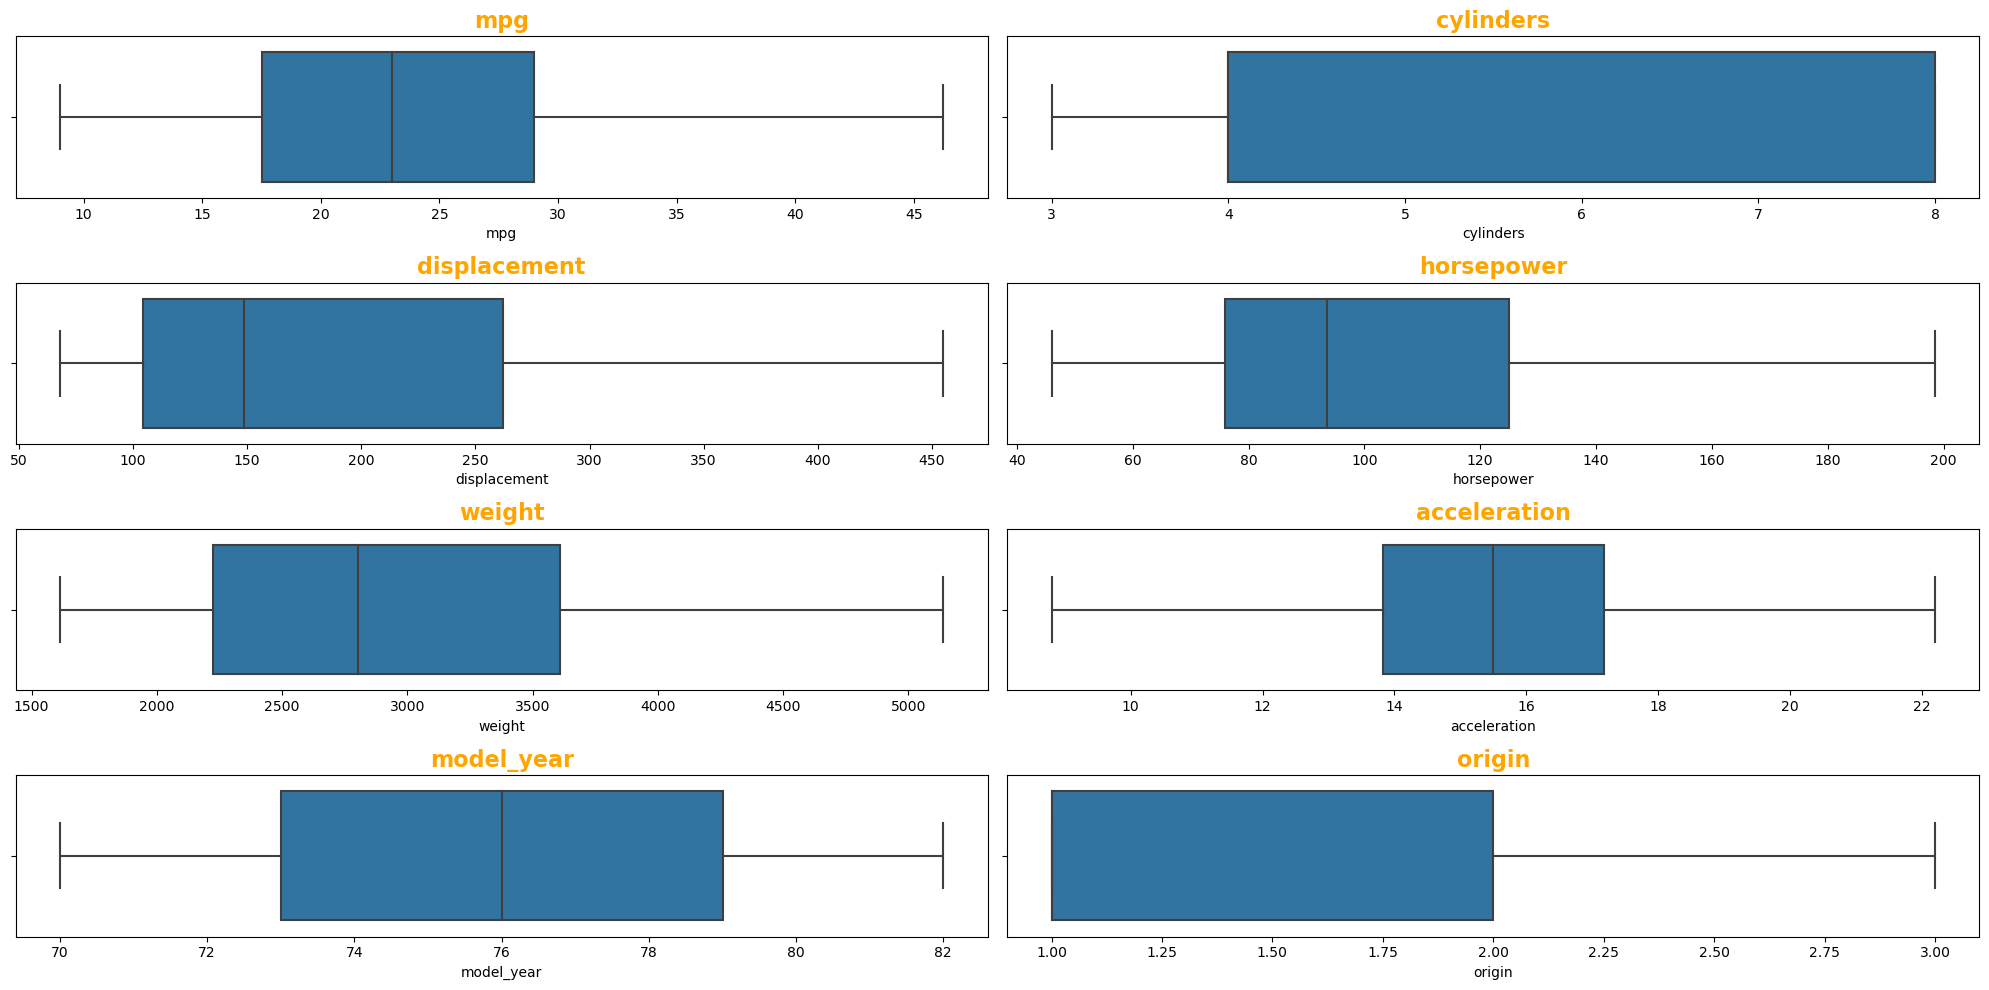

In [22]:
for col_name in car_data.columns:
    if is_numeric_dtype(car_data[col_name]):
        q1=np.quantile(car_data[col_name], 0.25)
        q3=np.quantile(car_data[col_name], 0.75)
        cut_off=1.5*(q3-q1)
        right_whisker= q3 + cut_off
        left_whiskers=q1 - cut_off

        #Replace every outlier on the upper side by the upper whisker
        for i in np.where(car_data[col_name] > right_whisker)[0]:
            car_data.loc[i,col_name] = right_whisker

        #Replace every outlier on the lower side by the lower whisker
        for i in np.where(car_data[col_name] < left_whiskers)[0]:
            car_data.loc[i,col_name] = left_whiskers

numerical_col=[i for i in car_data.columns if is_numeric_dtype(car_data[i])]
fig=plt.figure(figsize=(20,10))
for i in range(0,len(numerical_col)):
   ax=fig.add_subplot(4,2,i+1)
   sns.boxplot(data=car_data, x=numerical_col[i])
   ax.set_title(numerical_col[i],color='orange',weight='bold',fontsize=16)
plt.tight_layout()
plt.show()

In [23]:
# Standardizing dataset using z-score
car_data_original=car_data.copy(deep=True)
car_data.drop(columns=['car_name'], inplace=True, axis=0)
car_data=car_data.apply(zscore)

### A. Apply K-Means clustering for 2 to 10 clusters.
### B. Plot a visual and find elbow point.
### C. On the above visual, highlight which are the possible Elbow points.

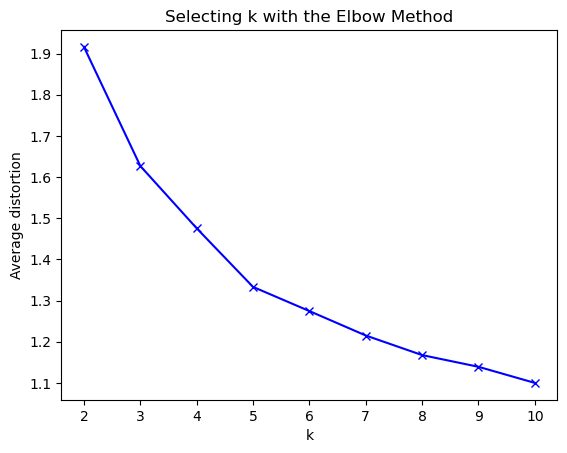

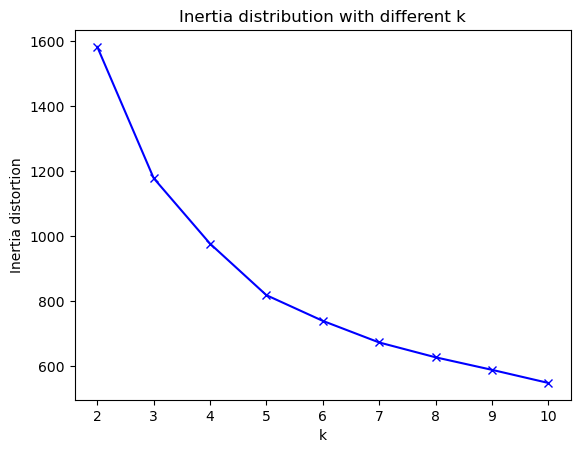

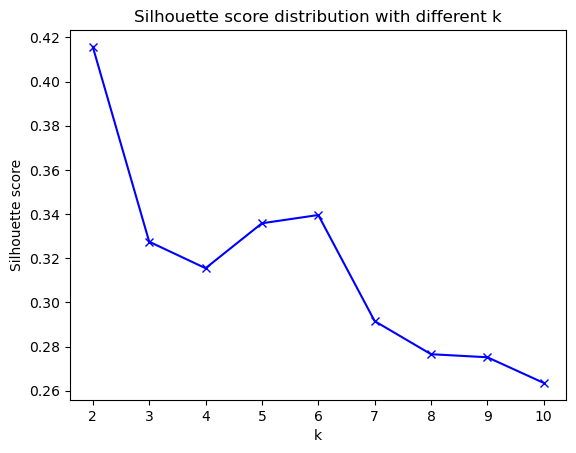

In [24]:
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

clusters=range(2,11)
mean_distortions=[]
inertia_list=[]
silhouette_score_list=[]

for k in clusters:
    model=KMeans(n_clusters=k, random_state=42)
    model.fit(car_data)
    mean_distortions.append(sum(np.min(cdist(car_data, model.cluster_centers_, 'euclidean'), axis=1)) / car_data.shape[0])
    inertia_list.append(model.inertia_)
    silhouette_score_list.append(silhouette_score(car_data,model.labels_))

plt.plot(clusters, mean_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

plt.plot(clusters, inertia_list, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia distortion')
plt.title('Inertia distribution with different k')
plt.show()

plt.plot(clusters, silhouette_score_list, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score distribution with different k')
plt.show()

As comparing elbow method, inertia distribution and silhouette method, we can take k as 3, becasue of elbow depiction with less interia and score.

### D. Train a K-means clustering model once again on the optimal number of clusters.
### E. Add a new feature in the DataFrame which will have labels based upon cluster value.

In [25]:
model=KMeans(n_clusters=3, random_state=42)
model.fit(car_data)
labels=model.labels_
model.inertia_, silhouette_score(car_data,labels)

(1177.80078980786, 0.32748334399502793)

In [26]:
### Append the prediction
car_data["group"] = labels
car_data_original['group']=labels
print("Groups Assigned : \n")
car_data.sample(5, random_state=42)

Groups Assigned : 



mpg  cylinders  displacement  horsepower    weight  acceleration  \
198  1.215636  -0.856321     -0.983552   -1.383016 -1.389757      0.687061   
396  0.574904  -0.856321     -0.705077   -0.675036 -0.408411      1.133207   
33  -0.578413   0.320935      0.370411   -0.103207 -0.397770     -0.948807   
208 -1.347291   1.498191      1.196232    1.258291  1.146372     -0.874449   
93  -1.219145   1.498191      1.196232    1.258291  1.497528     -0.391125   

     model_year    origin  group  
198   -0.002721  1.781589      2  
396    1.621983 -0.715145      0  
33    -1.356642 -0.715145      0  
208   -0.002721 -0.715145      1  
93    -0.815074 -0.715145      1

### F. Plot a visual and color the datapoints based upon clusters.

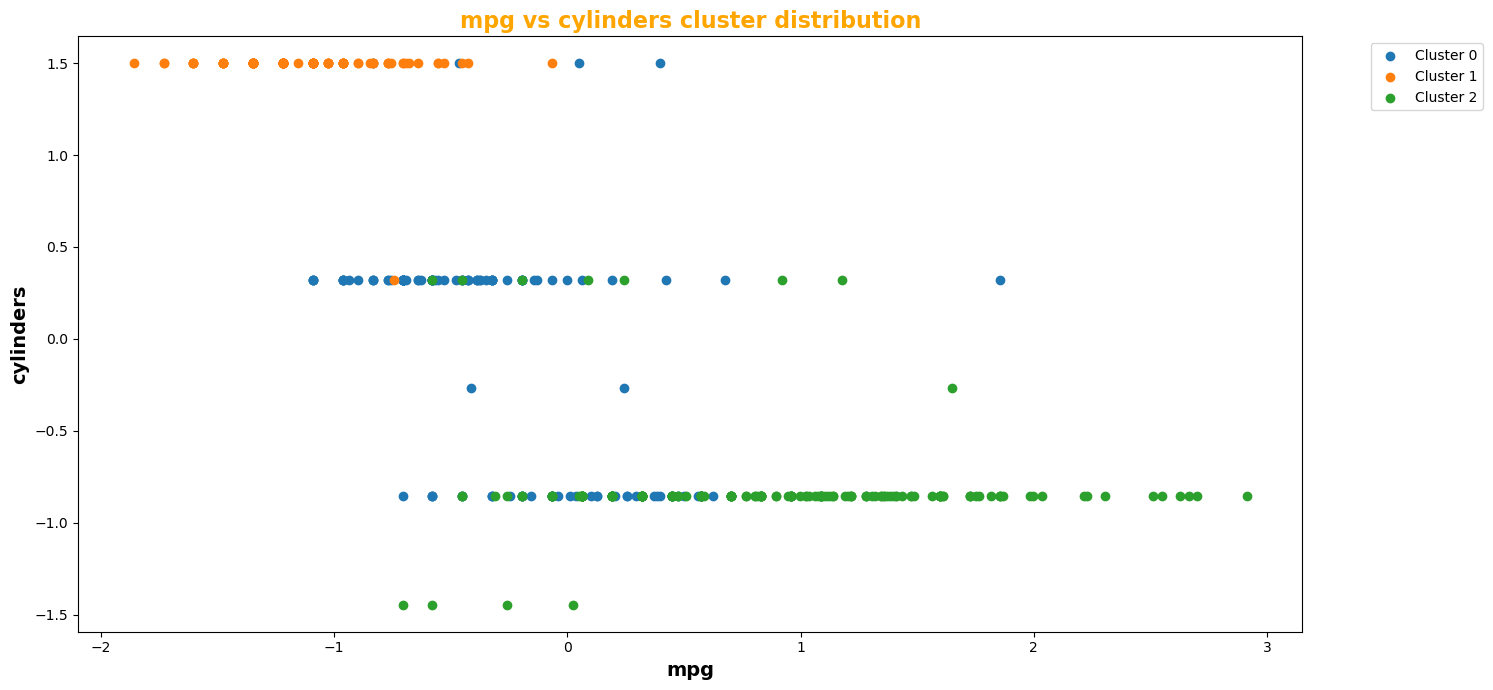

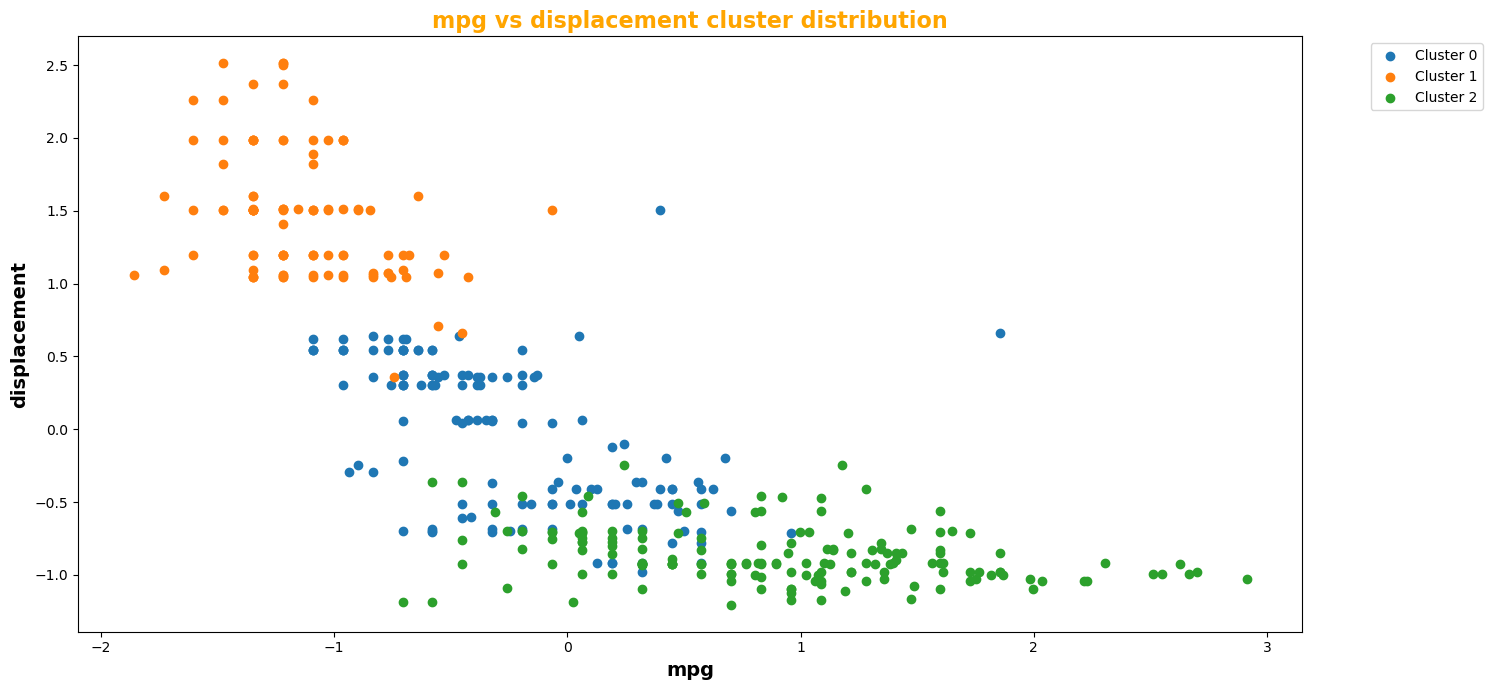

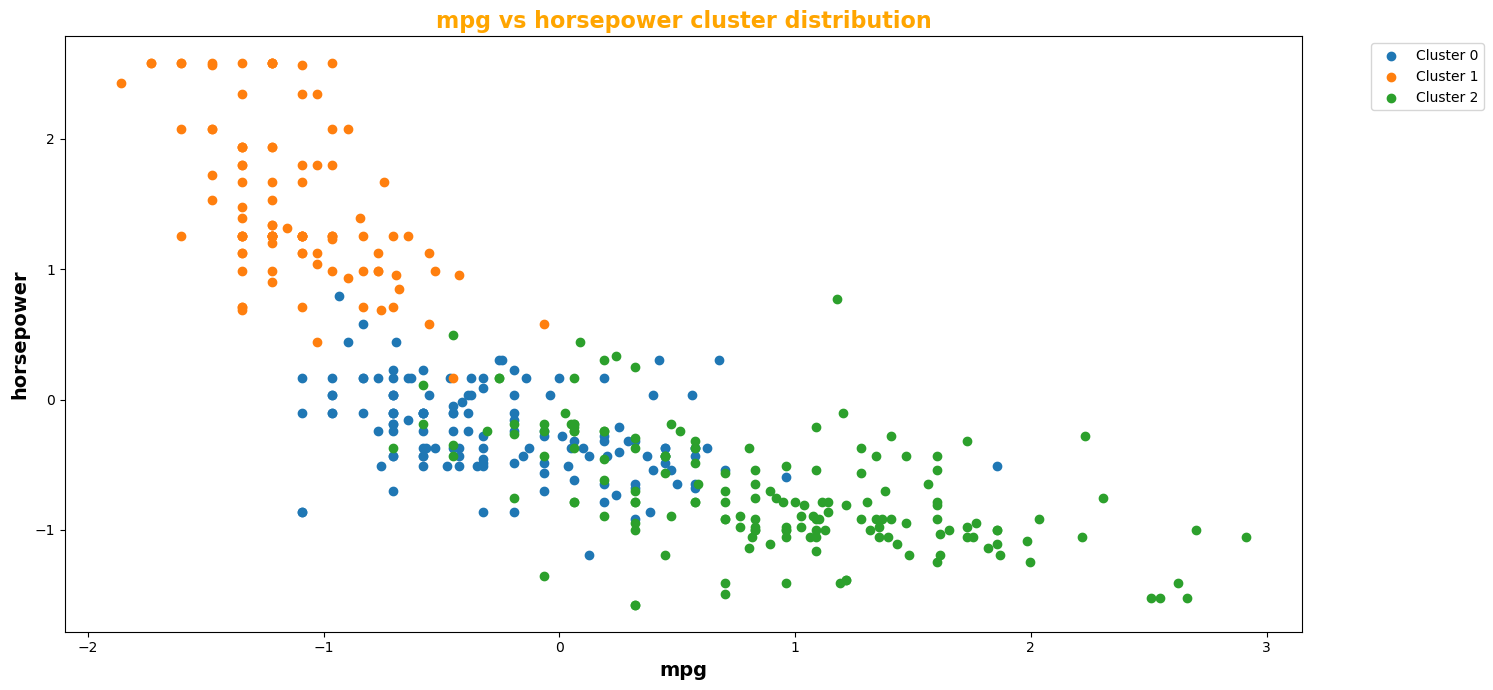

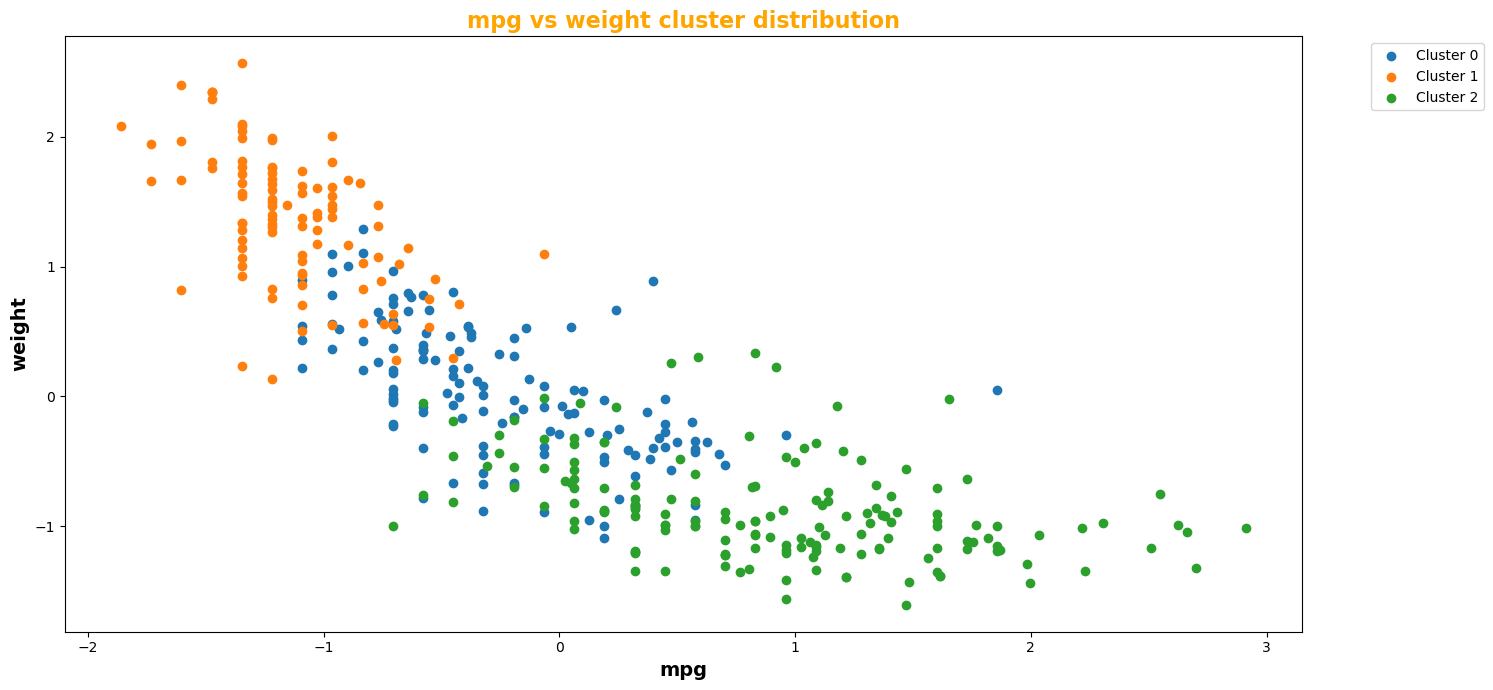

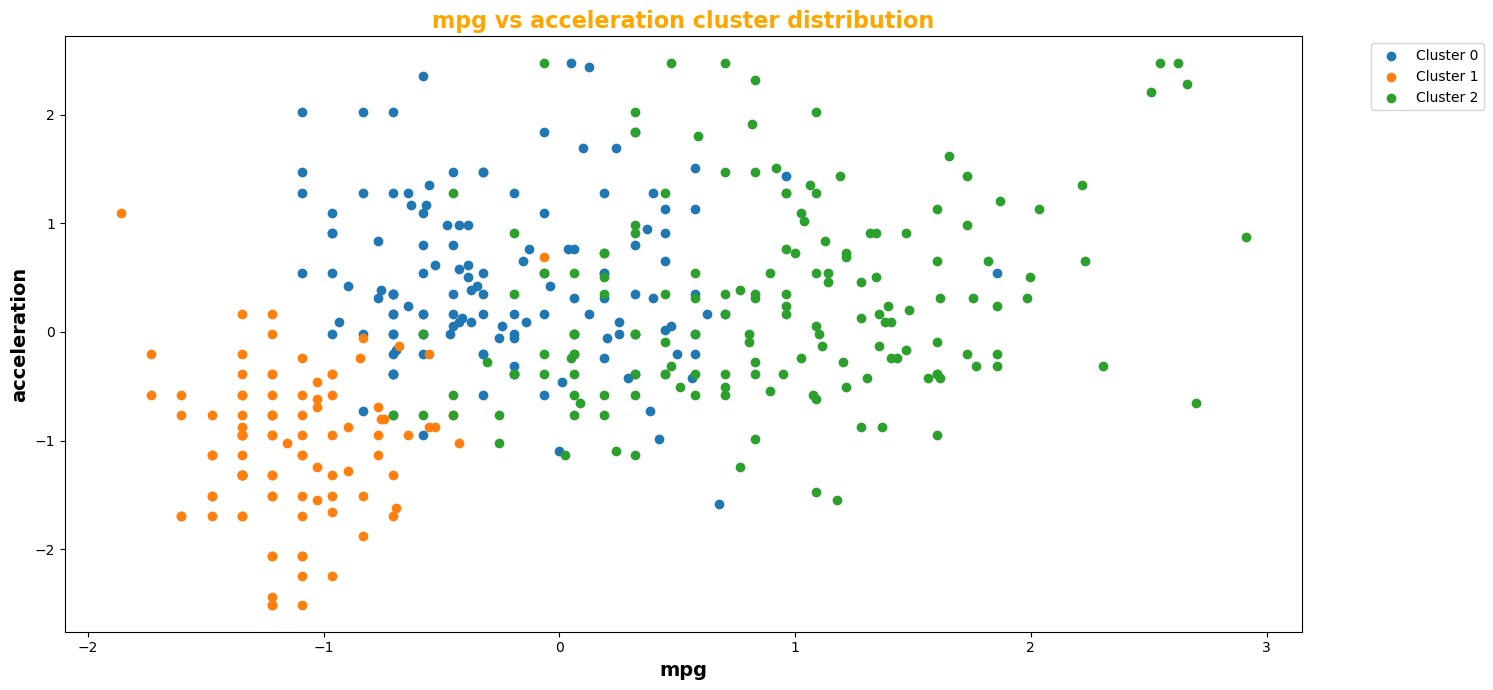

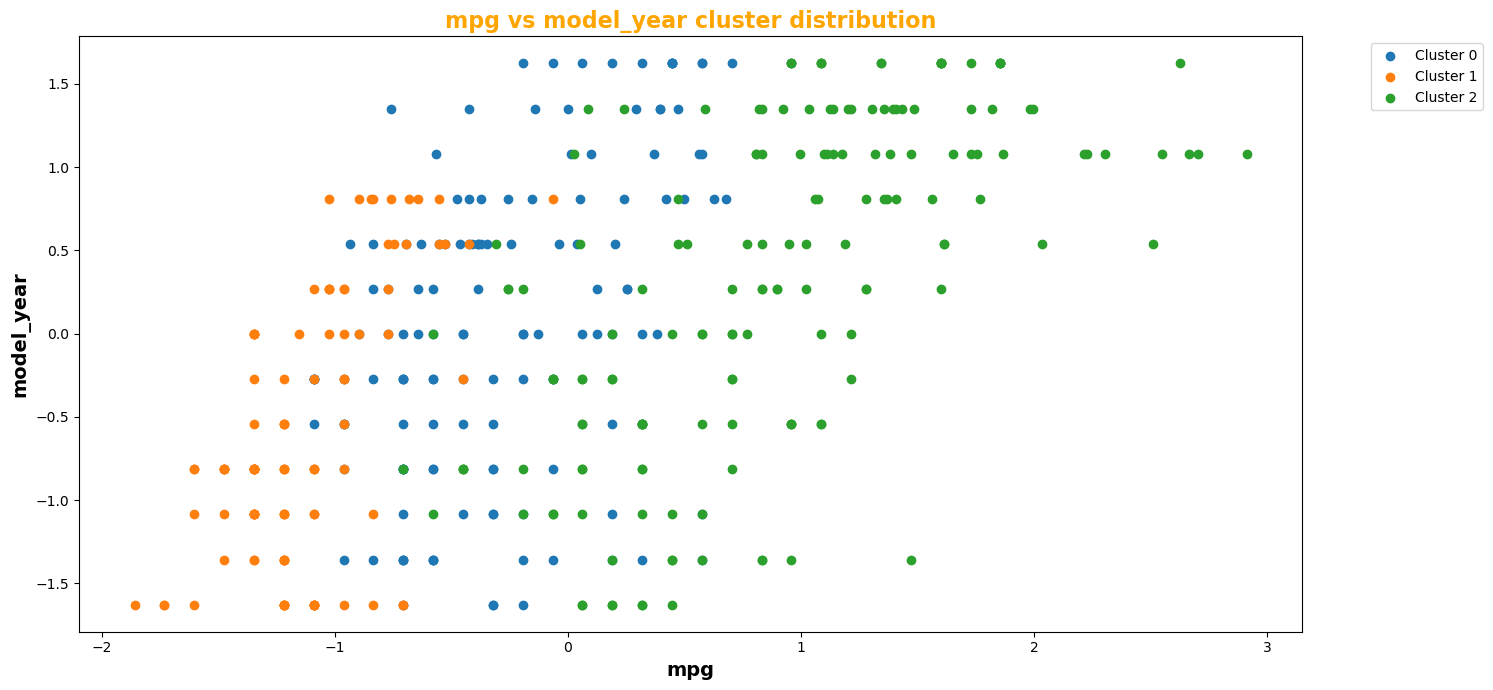

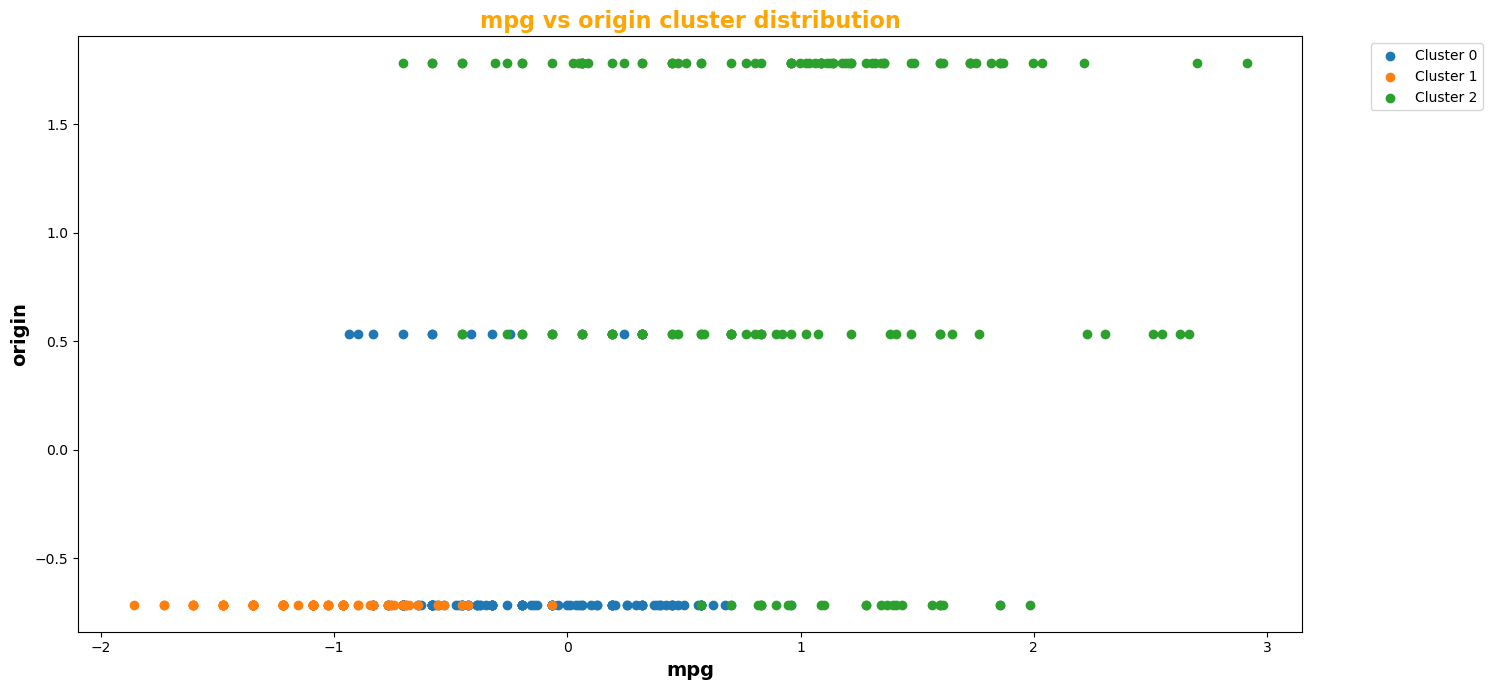

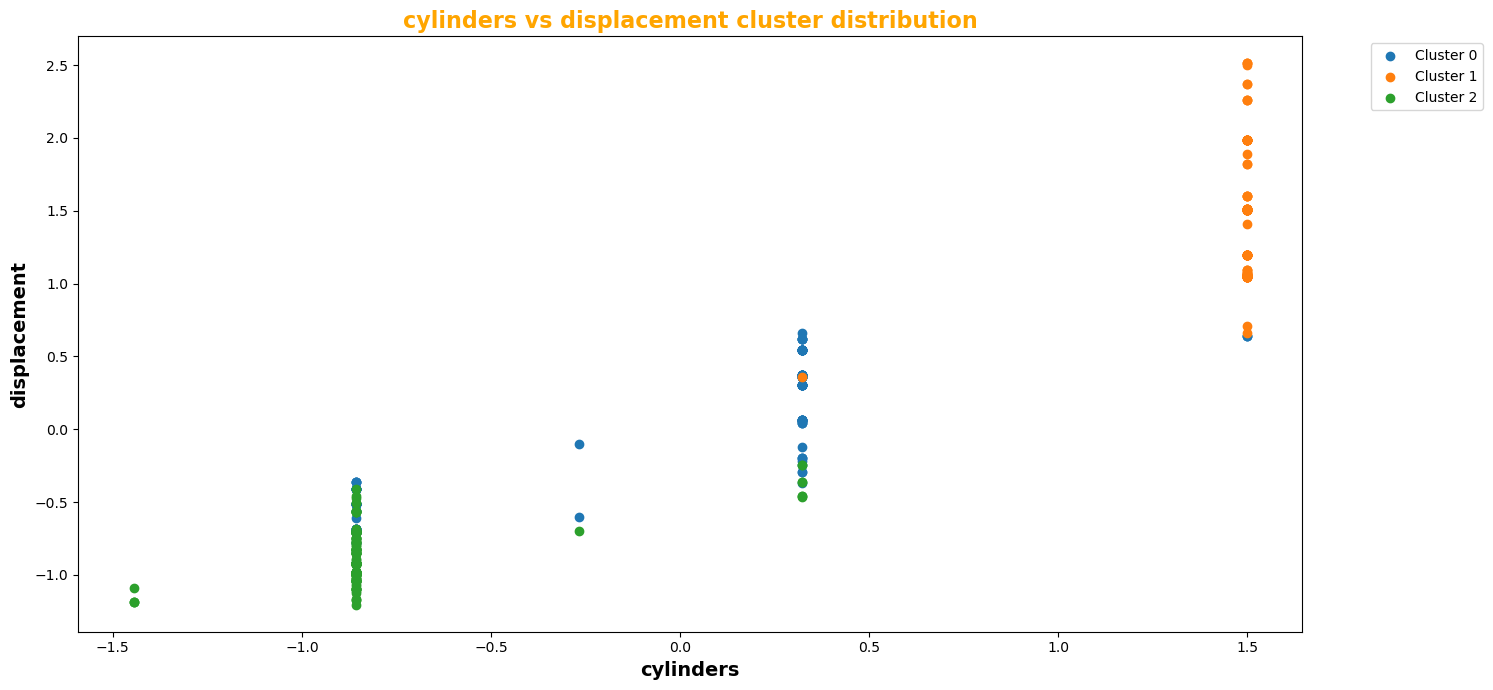

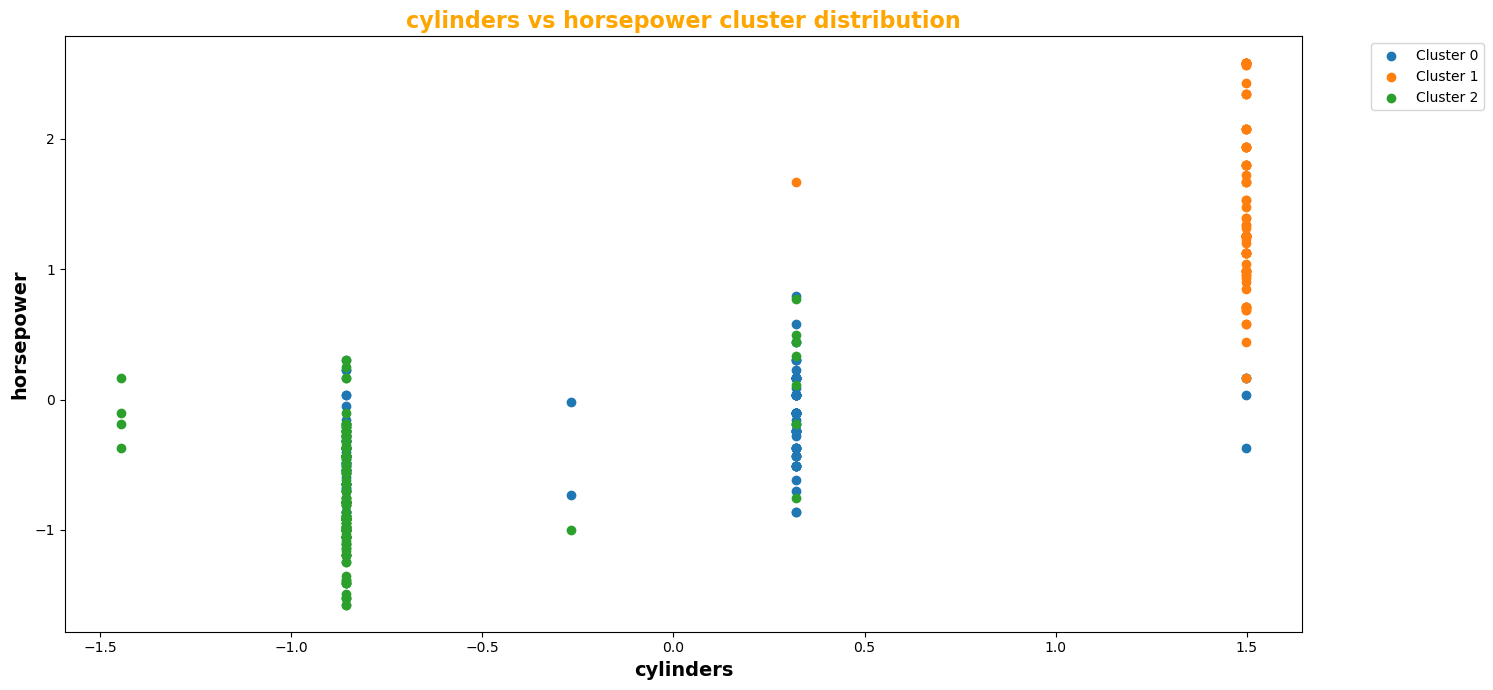

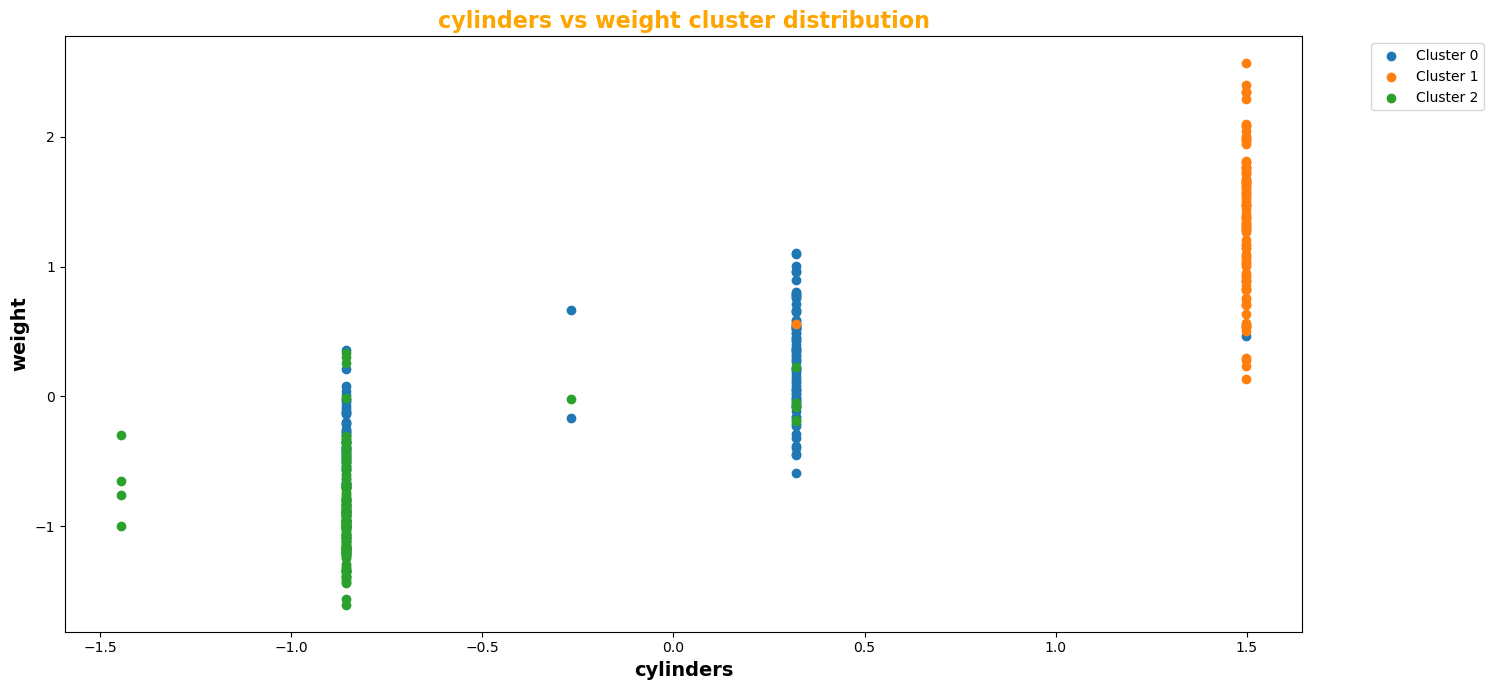

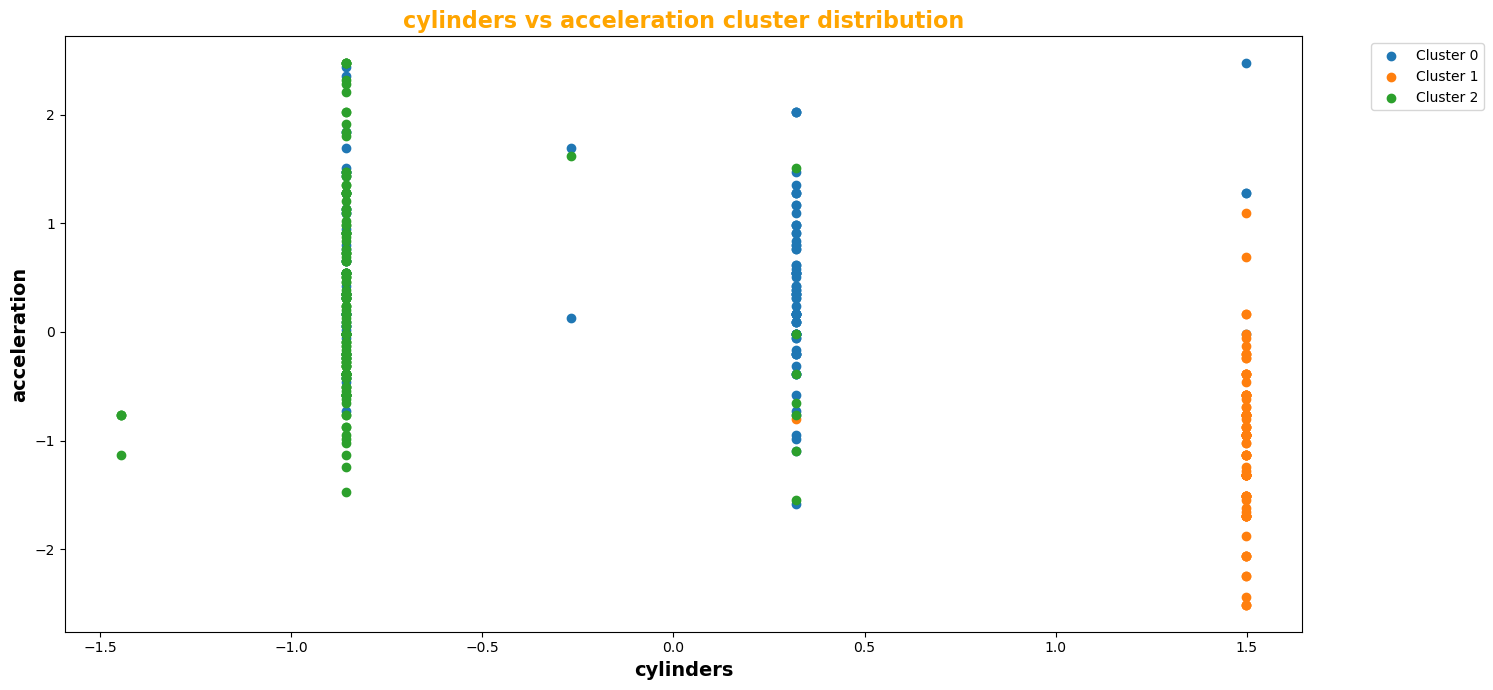

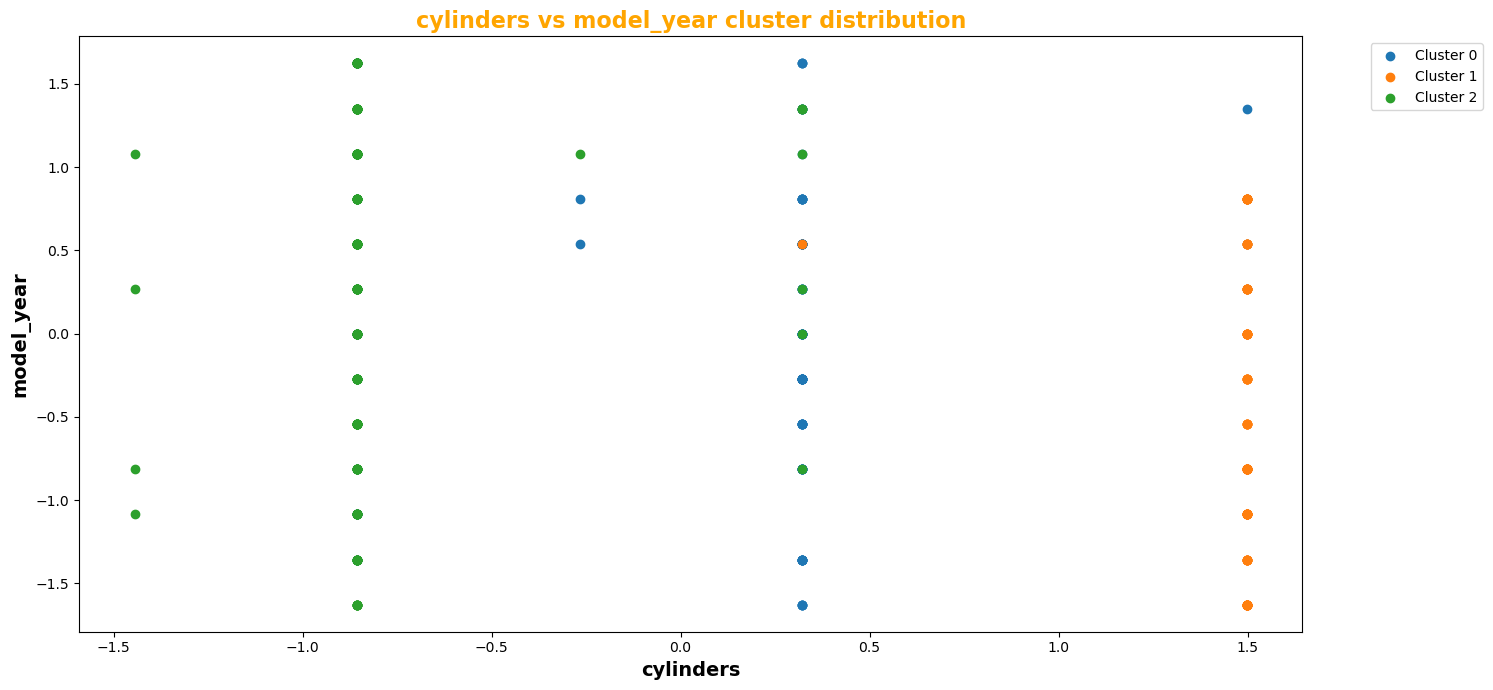

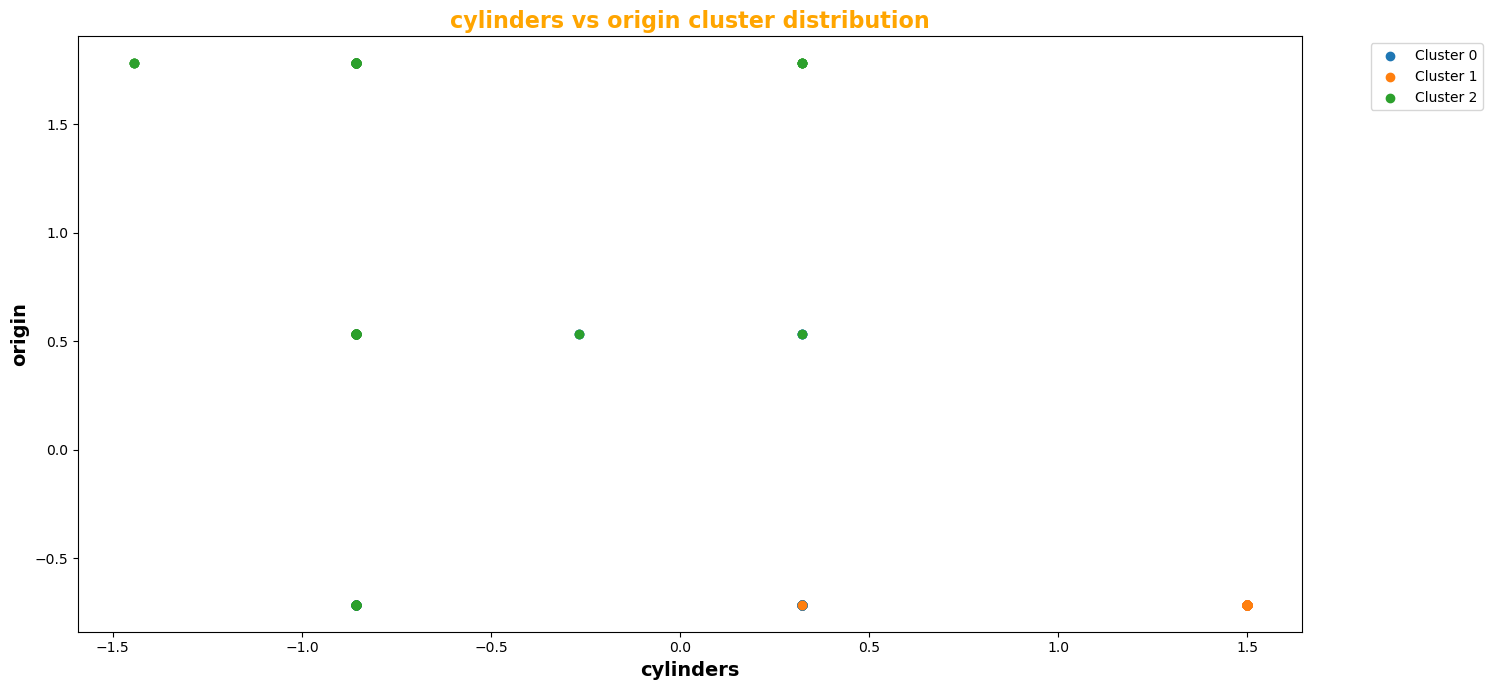

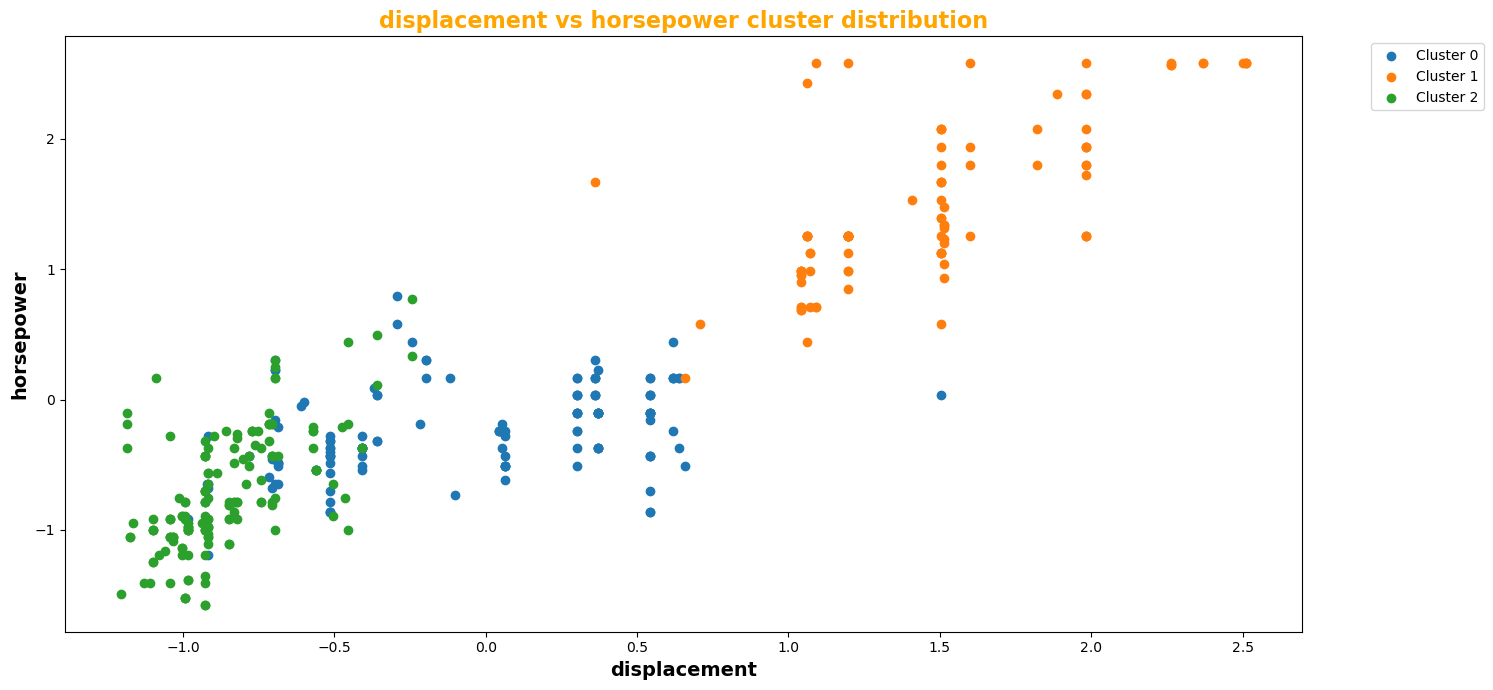

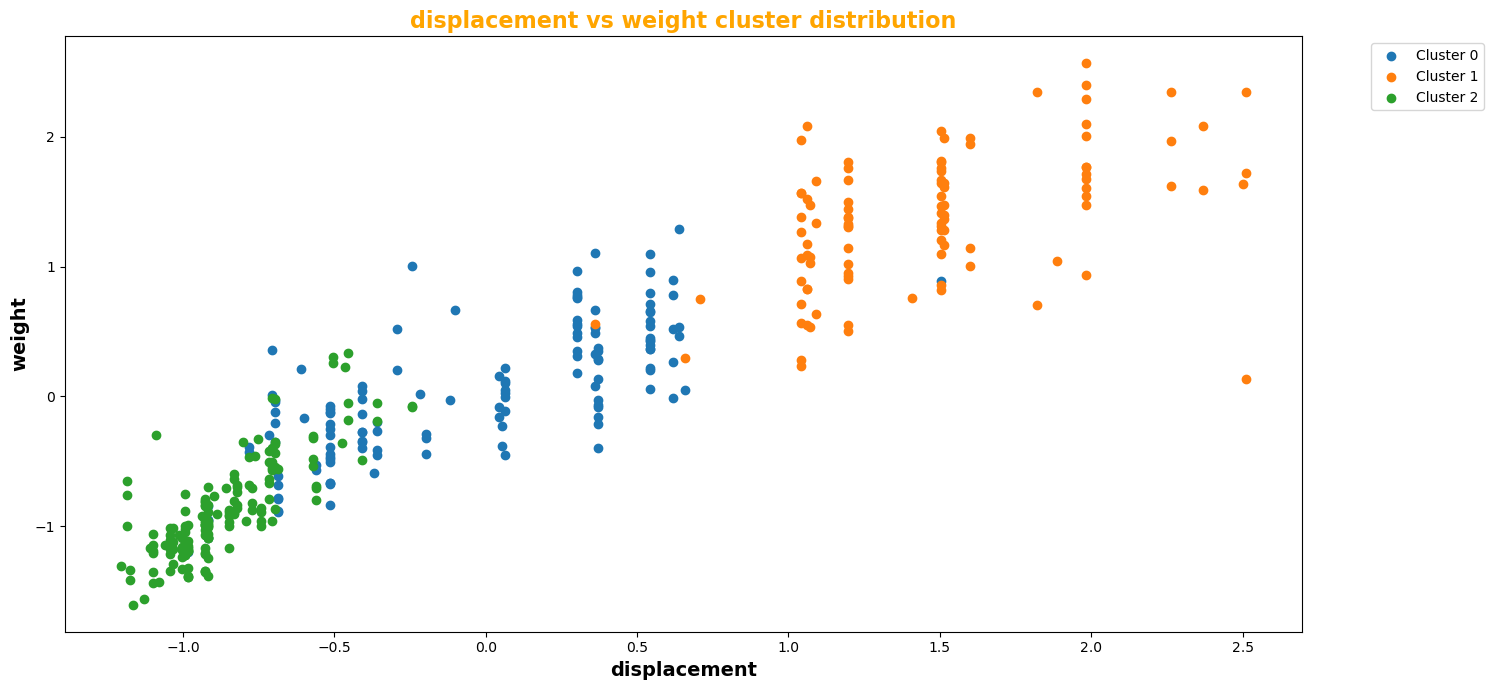

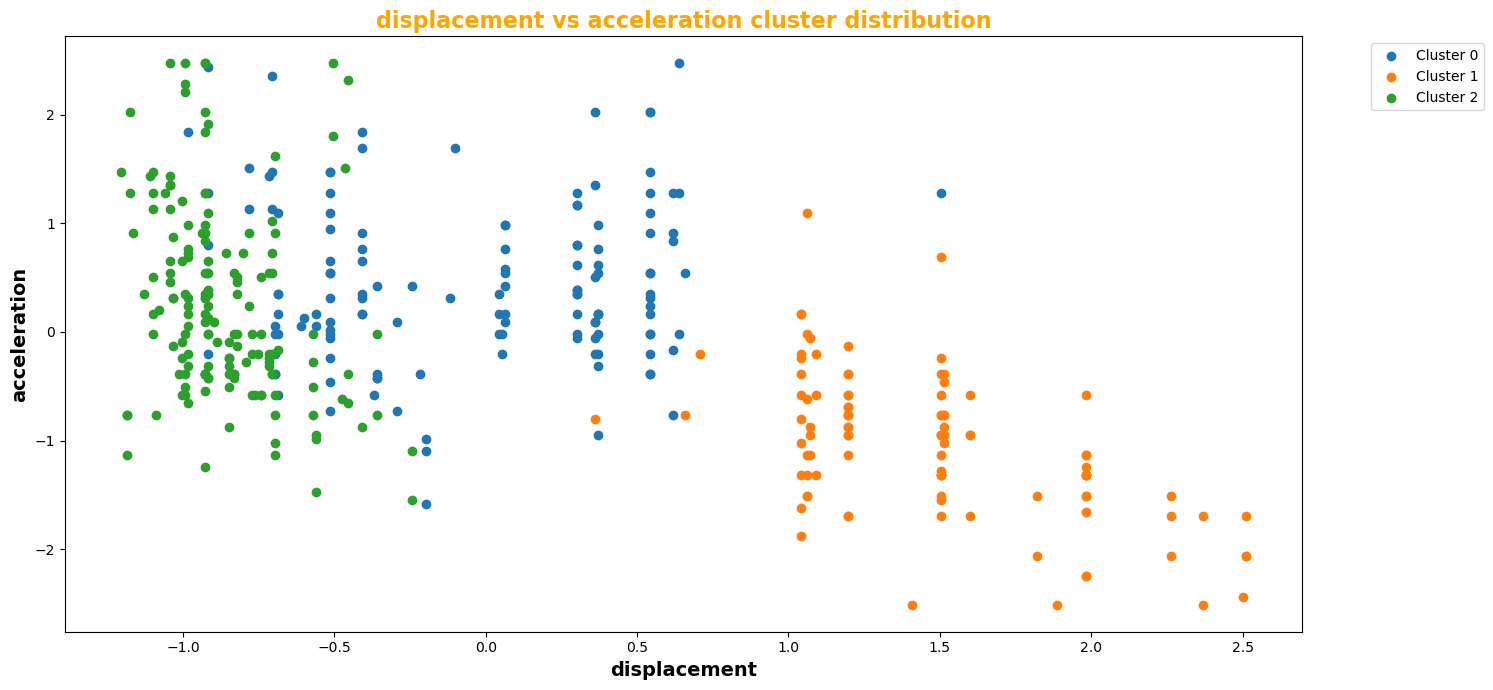

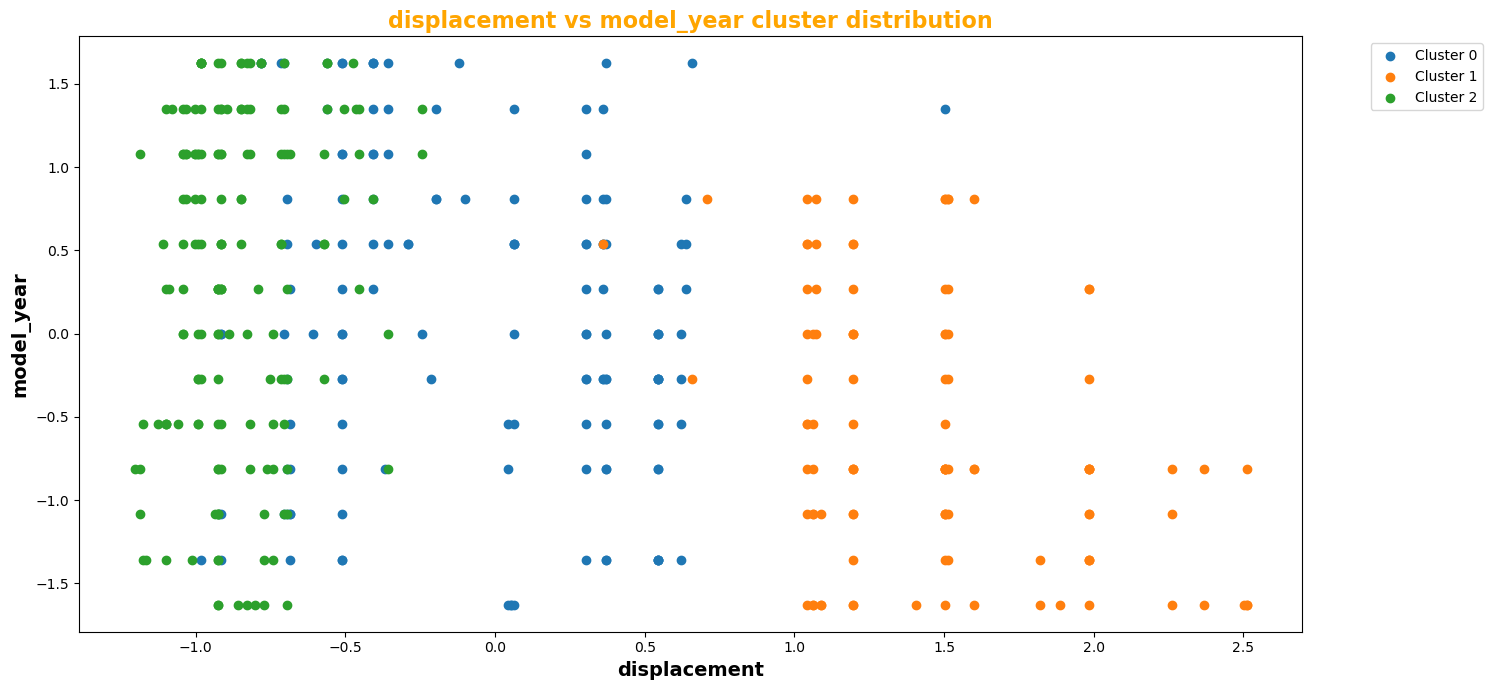

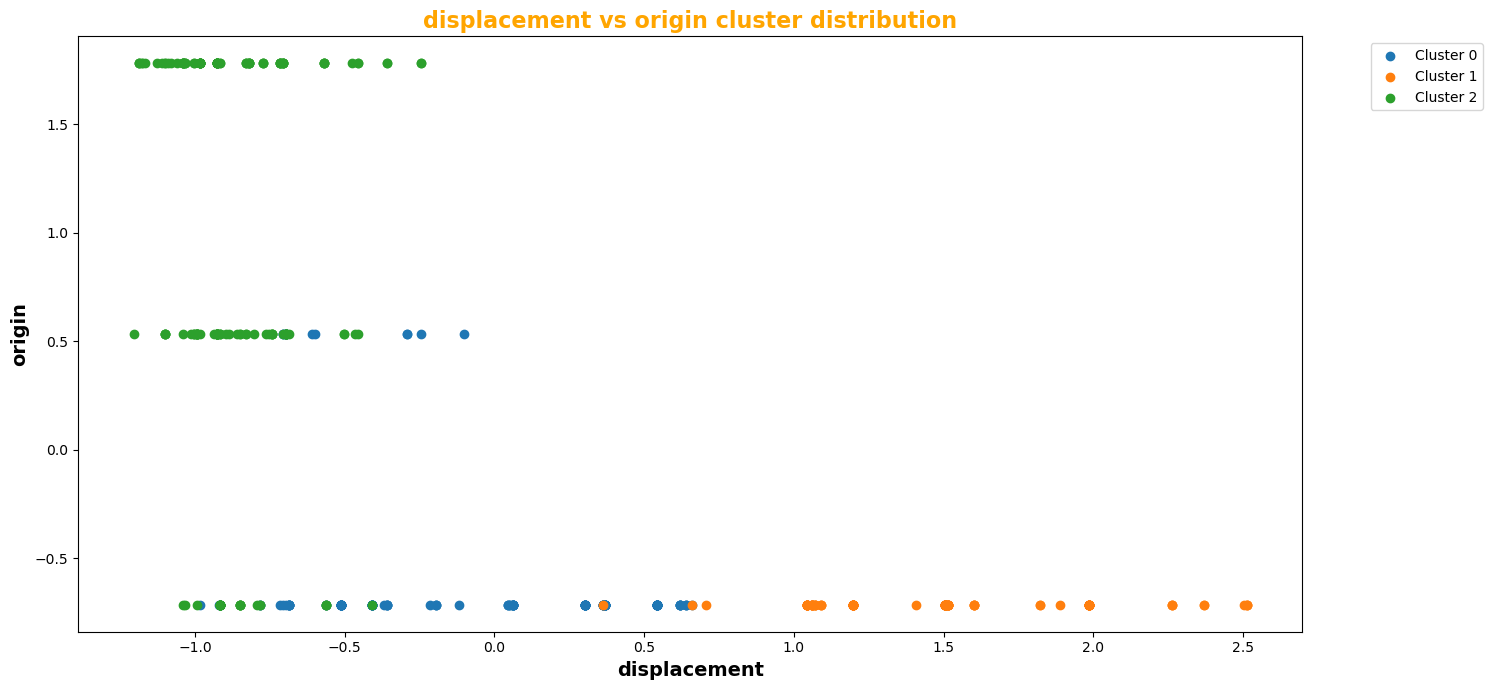

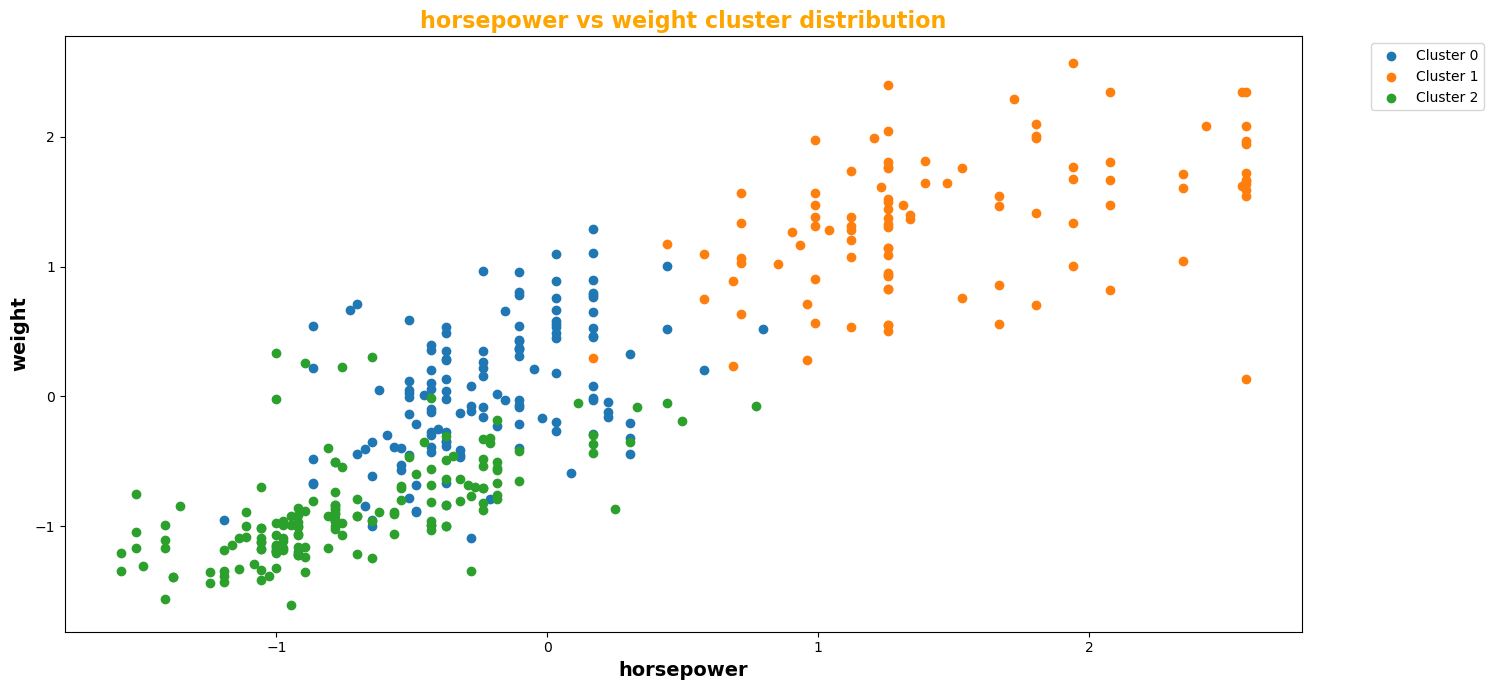

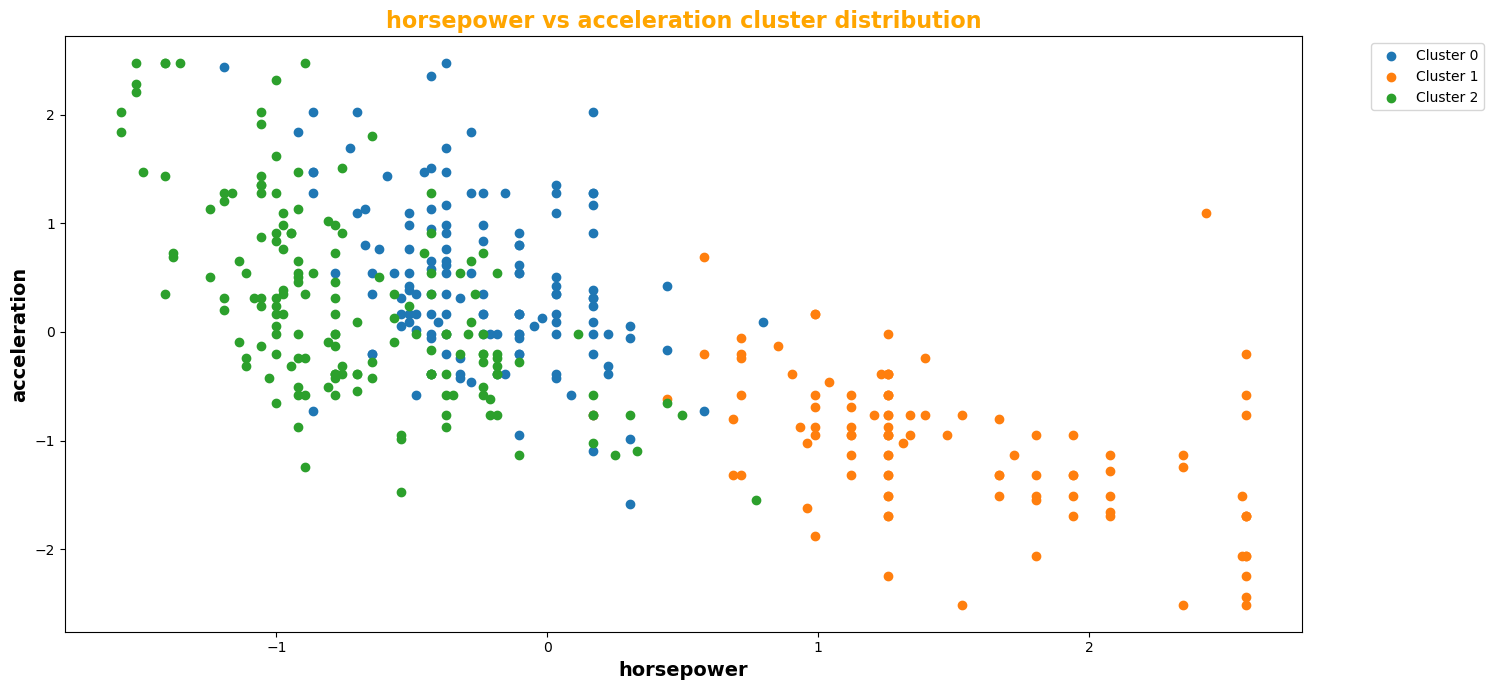

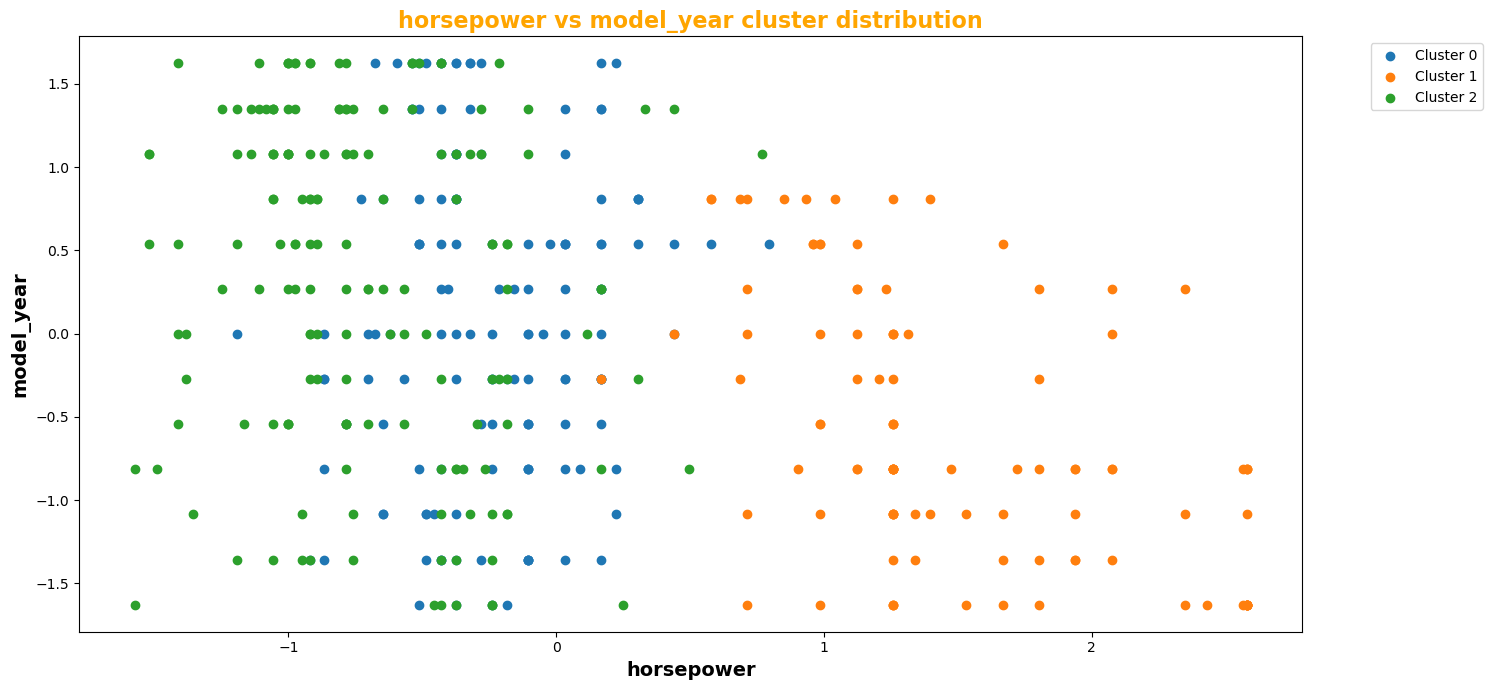

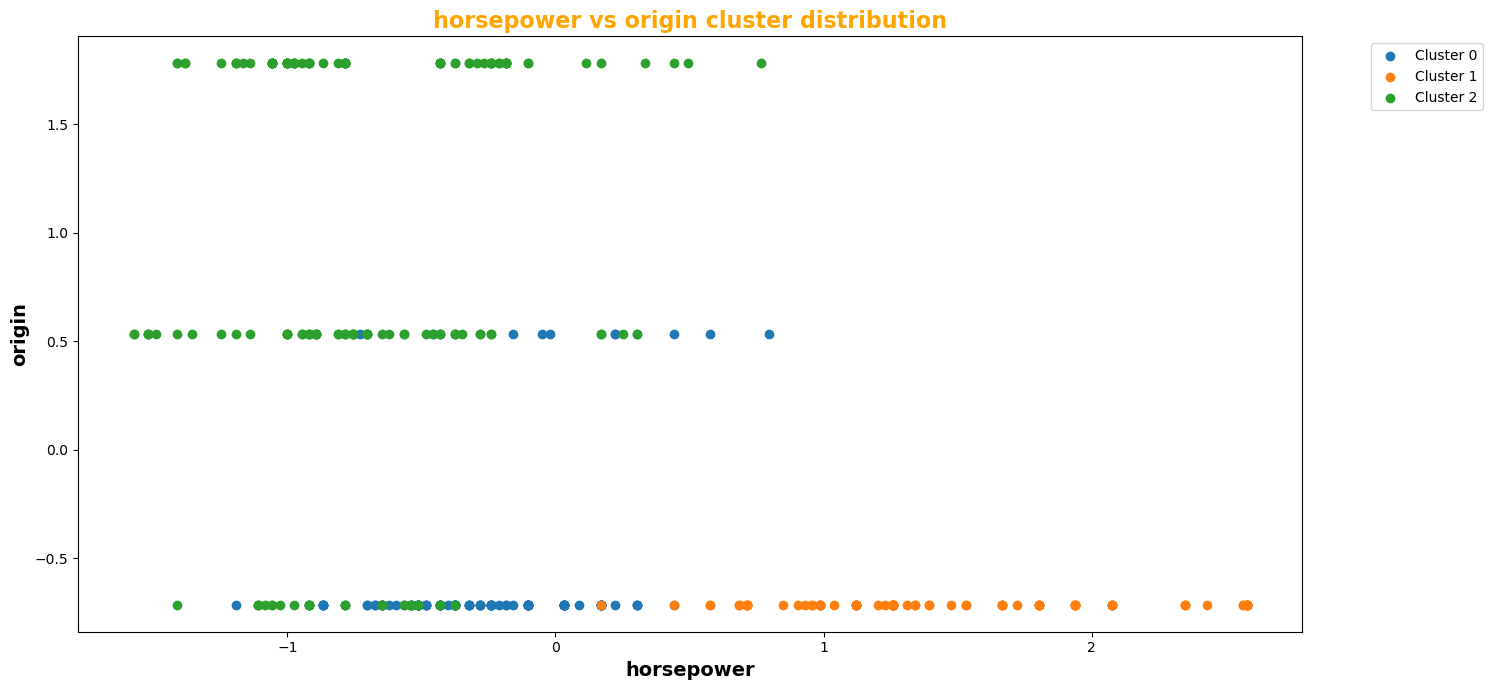

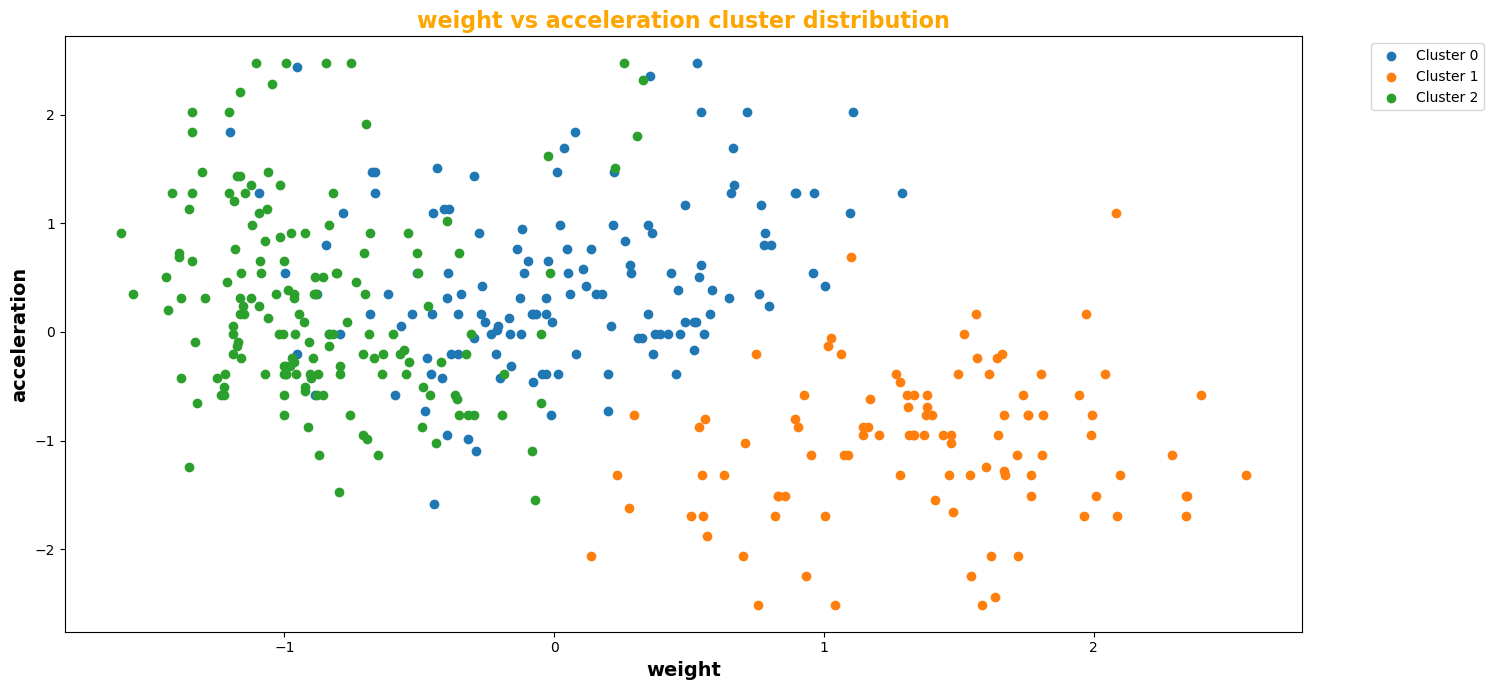

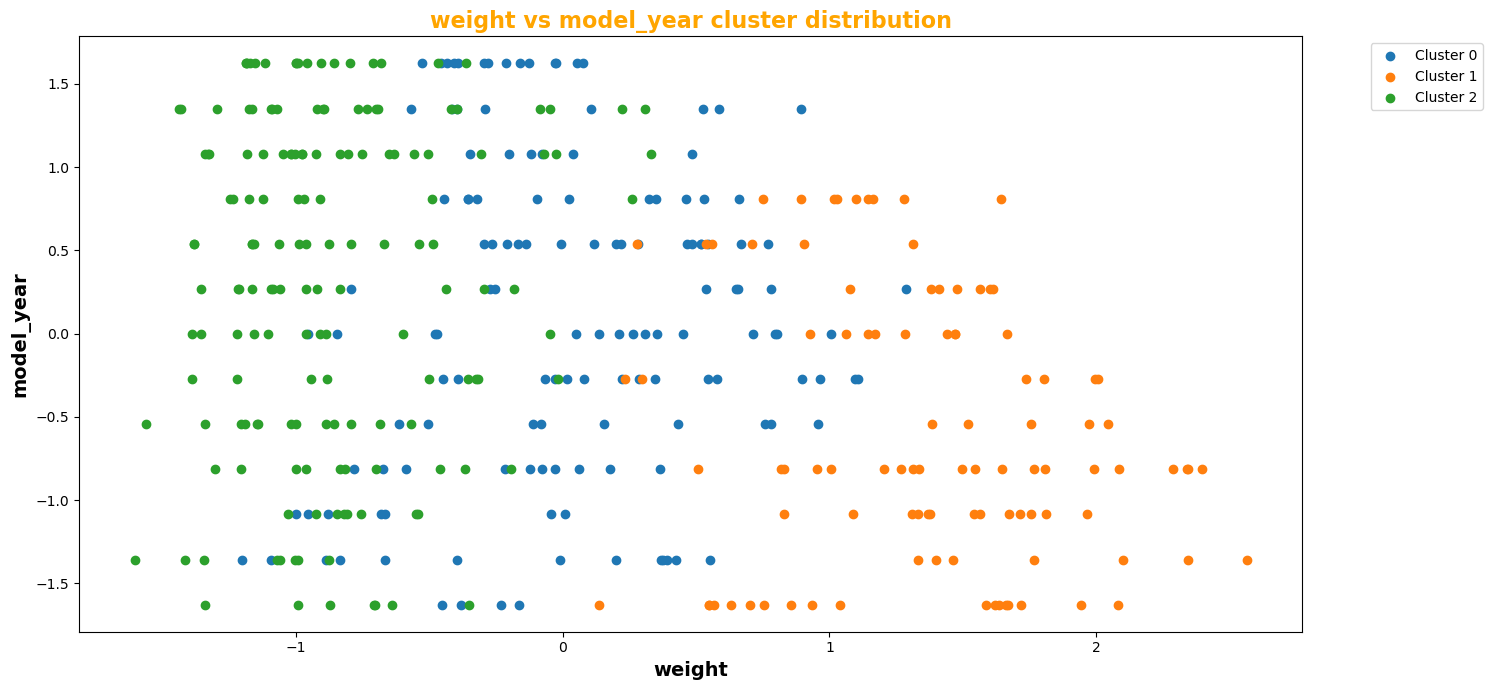

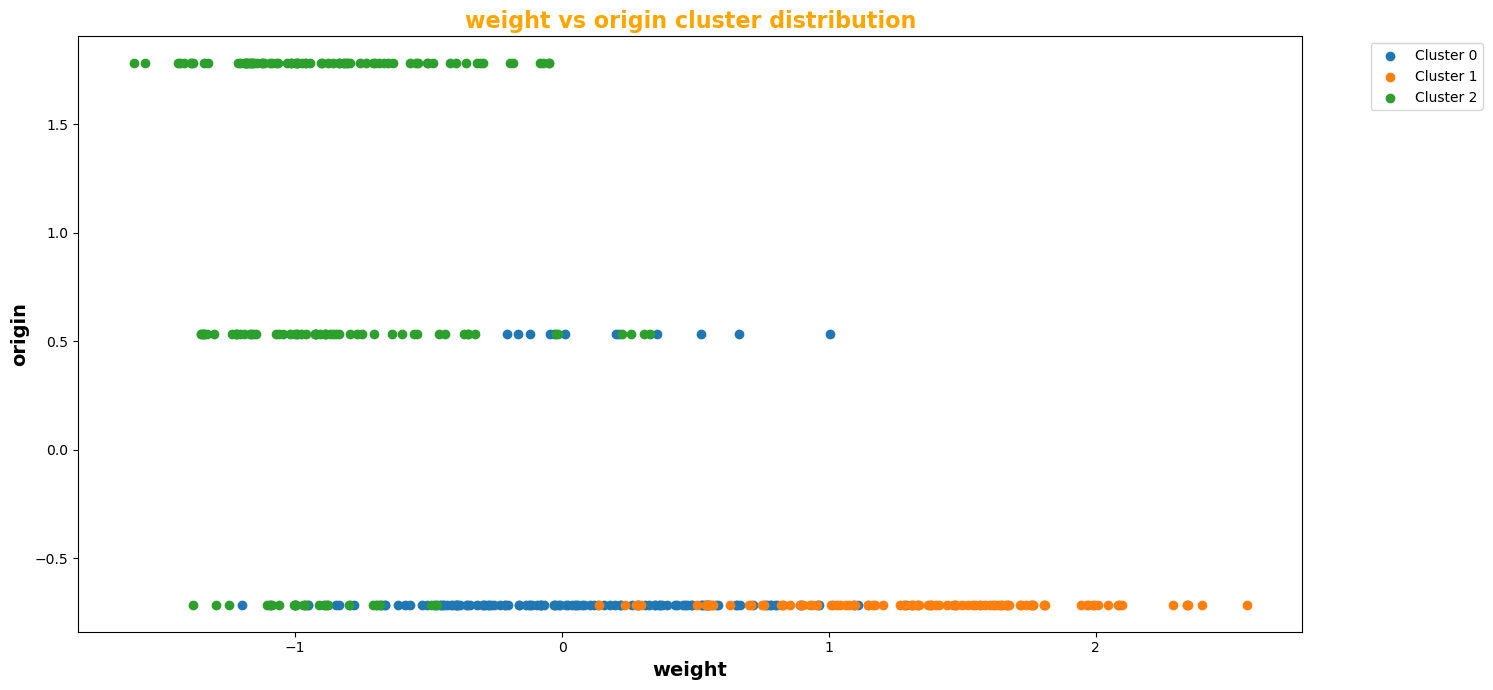

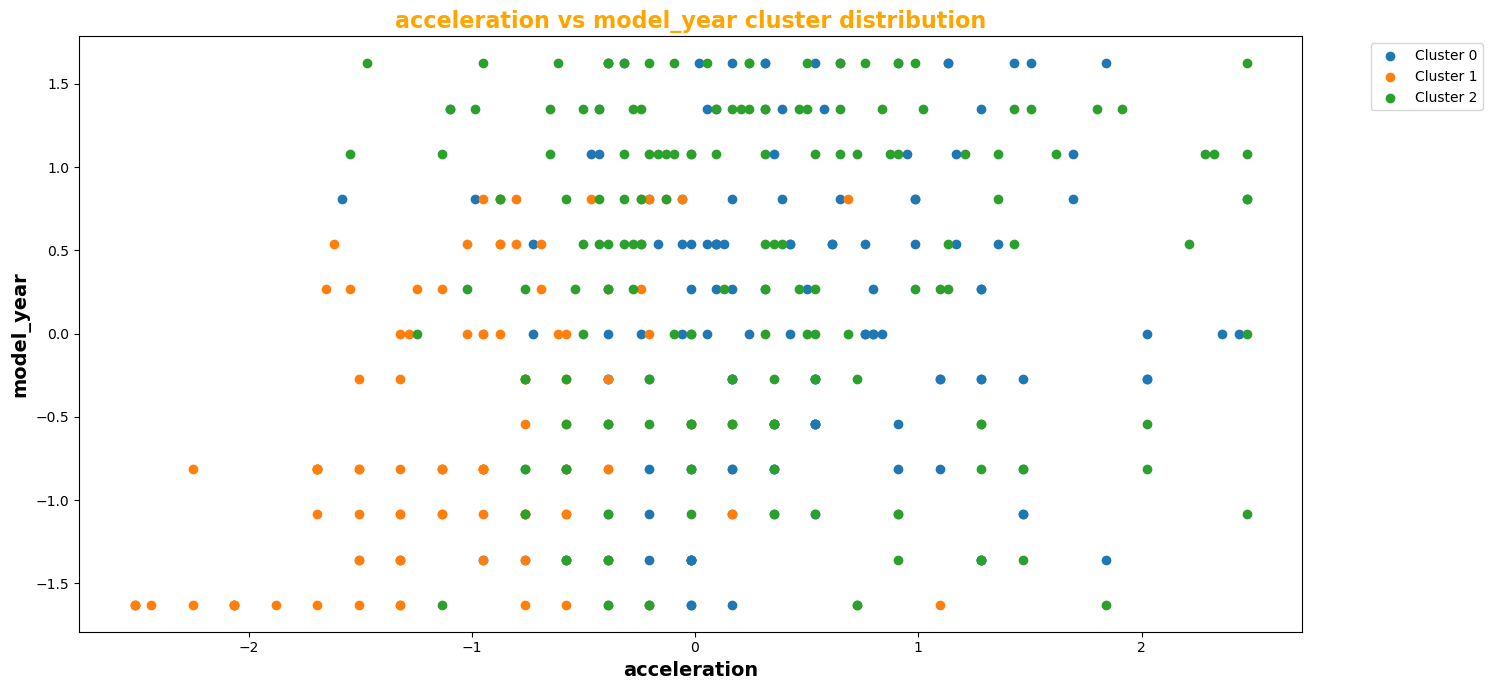

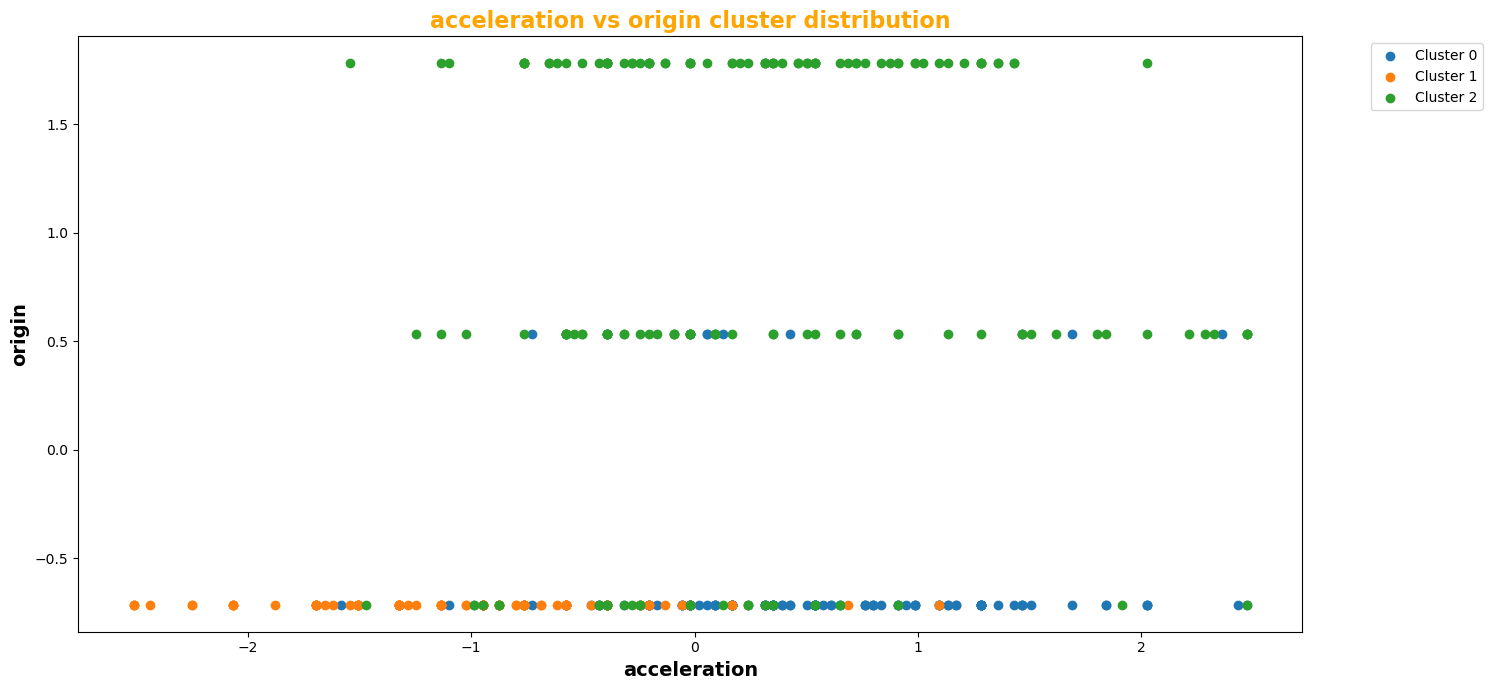

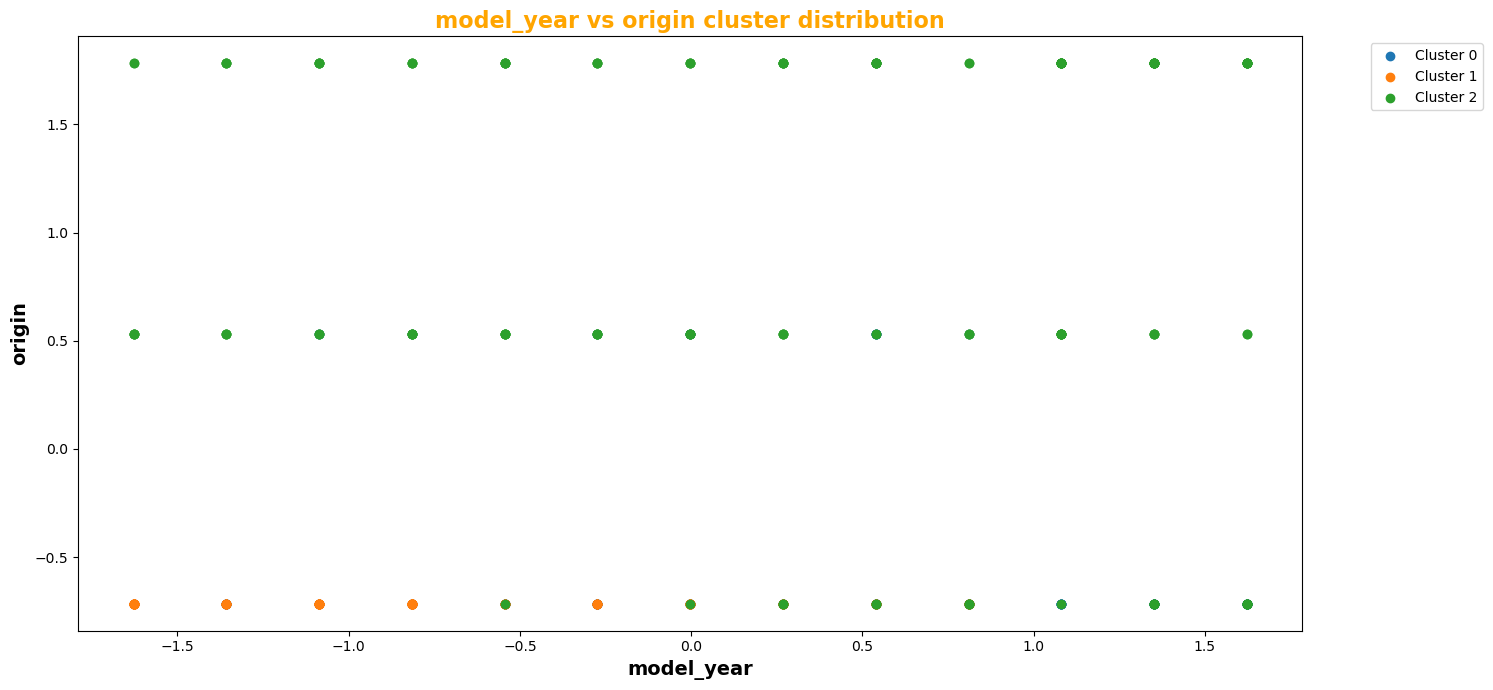

In [27]:
unique_groups=sorted(car_data.group.unique())
label=car_data.group
car_data_col_len=len(car_data.columns.drop('group'))

for i in range(0, car_data_col_len-1):
    for j in range(i+1, car_data_col_len):
        plt.figure(figsize=(15,7))
        for grp in unique_groups:
            plt.scatter(car_data[label==grp][car_data.columns[i]] , car_data[label==grp][car_data.columns[j]] , label='Cluster {group}'.format(group=grp))
        plt.xlabel(car_data.columns[i], weight='bold', fontsize=14)
        plt.ylabel(car_data.columns[j], weight='bold', fontsize=14)
        plt.title(car_data.columns[i]+' vs '+car_data.columns[j] +' cluster distribution',color='orange',weight='bold',fontsize=16)
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        plt.tight_layout()
        plt.show()

All features have been visualised on the basis of cluster group that is identified.

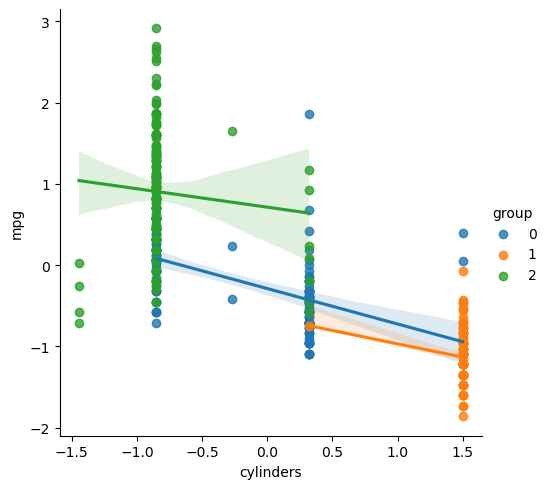

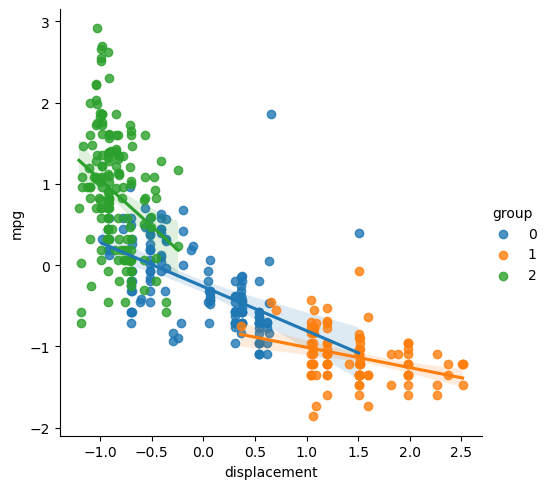

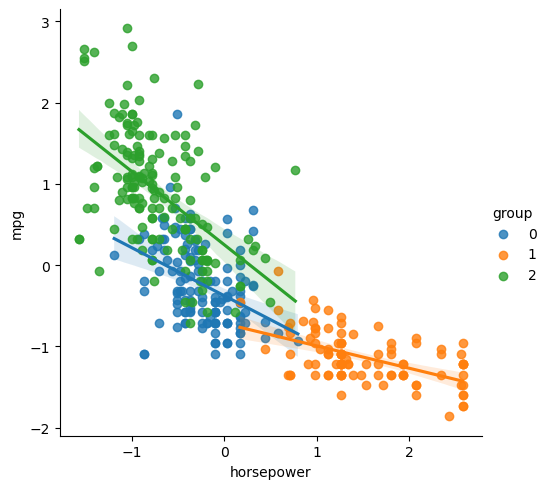

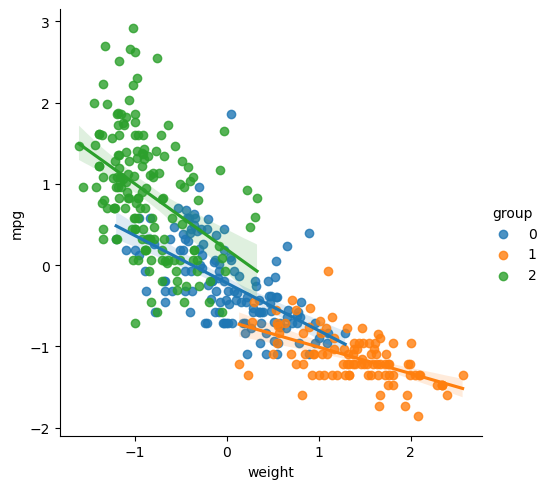

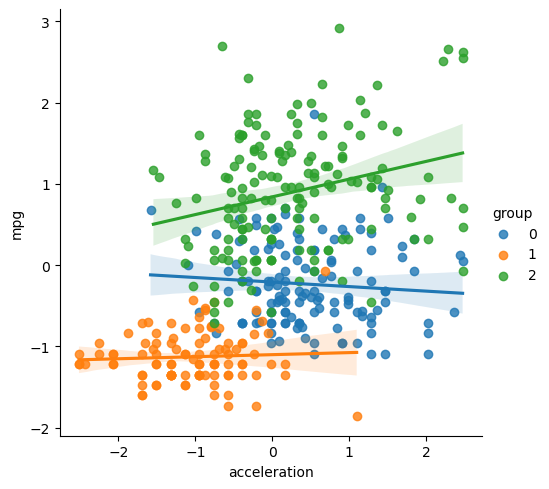

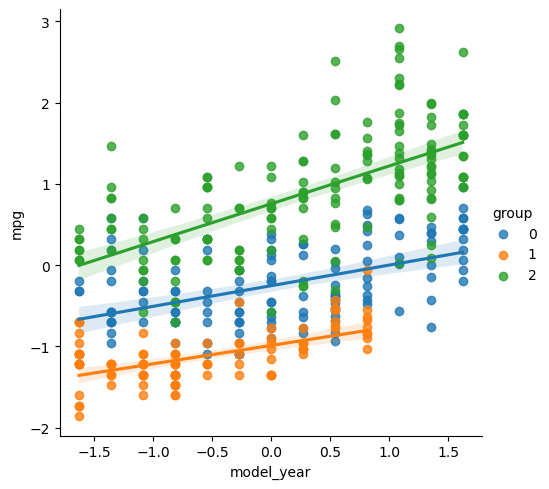

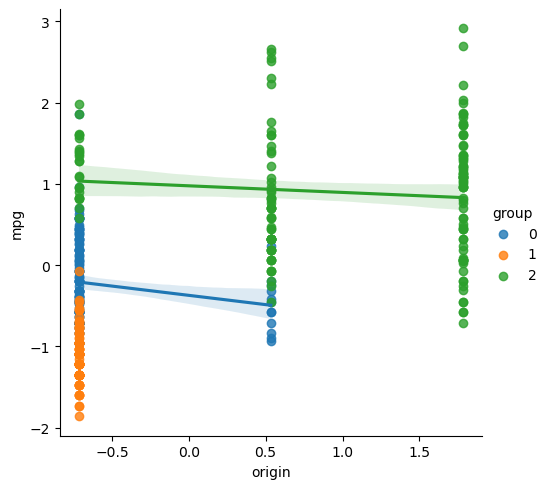

In [28]:
# Visualizing data with mpg as y-axis var.

for i in car_data.columns.drop(['group','mpg']):
    sns.lmplot(data=car_data, x=i, y='mpg',hue='group');

In [29]:
clust_profile=car_data_original.drop(['car_name'],axis=1)

clust_profile=clust_profile.groupby('group').mean()

clust_profile['freq']=car_data_original['group'].value_counts().sort_index()

clust_profile

mpg  cylinders  displacement  horsepower       weight  \
group                                                                
0      21.695620   5.240876    187.558394   94.897810  2990.861314   
1      14.715000   7.980000    346.370000  158.505000  4126.910000   
2      30.525776   4.068323    103.422360   77.372671  2234.720497   

       acceleration  model_year    origin  freq  
group                                            
0         16.772263   76.313869  1.087591   137  
1         12.735000   73.750000  1.000000   100  
2         16.263354   77.155280  2.341615   161

### G. Pass a new DataPoint and predict which cluster it belongs to.

In [30]:
# Creating new record for prediction
new_record=pd.DataFrame({'mpg': [24], 'cylinders':[5], 'displacement':[193], 'horsepower':[104], 'weight':[2970], 'acceleration':[15.5], 'model_year':[76], 'origin':[2], 'car_name':['chevy s-10']})
car_data_new=pd.concat([car_data_original, new_record], axis=0)
car_data_new.reset_index(inplace=True, drop=True)
car_data_new.tail()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
394  44.0          4          97.0        52.0    2130          22.2   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   
398  24.0          5         193.0       104.0    2970          15.5   

     model_year  origin       car_name  group  
394          82       2      vw pickup    2.0  
395          82       1  dodge rampage    2.0  
396          82       1    ford ranger    0.0  
397          82       1     chevy s-10    0.0  
398          76       2     chevy s-10    NaN

In [31]:
car_data_new_scaled=car_data_new.drop(columns=['car_name','group']).apply(zscore)
car_data_new.loc[398,'group']=model.predict(car_data_new_scaled[car_data_new_scaled.index==398])
car_data_new.tail(1)

mpg  cylinders  displacement  horsepower  weight  acceleration  \
398  24.0          5         193.0       104.0    2970          15.5   

     model_year  origin    car_name  group  
398          76       2  chevy s-10    0.0

New record which was inserted has been predicted as group-0 or cluster-0.

################################

# PART-B

################################

## 1. Data Understanding & Cleaning

### A. Read ‘vehicle.csv’ and save as DataFrame.

In [32]:
vehicle_data=pd.read_csv('vehicle.csv')
vehicle_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [33]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

Vehicle dataset has 846 data entries and 19 columns.

### B. Check percentage of missing values and impute with correct approach.

In [34]:
# To check the missing data percentage
vehicle_data.isnull().mean() * 100

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [35]:
(vehicle_data.isnull().sum() / car_data.shape[0]) * 100

compactness                    0.000000
circularity                    1.256281
distance_circularity           1.005025
radius_ratio                   1.507538
pr.axis_aspect_ratio           0.502513
max.length_aspect_ratio        0.000000
scatter_ratio                  0.251256
elongatedness                  0.251256
pr.axis_rectangularity         0.753769
max.length_rectangularity      0.000000
scaled_variance                0.753769
scaled_variance.1              0.502513
scaled_radius_of_gyration      0.502513
scaled_radius_of_gyration.1    1.005025
skewness_about                 1.507538
skewness_about.1               0.251256
skewness_about.2               0.251256
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

Vehicle dataset contains few amount of missing values that need to be imputed.
Above 14 columns are having missing data.
As there are many columns that are having missing values, so we will impute only those rows which is having only minimal missing data.

In [36]:
vehicle_data[vehicle_data.isnull().any(axis=1)]

compactness  circularity  distance_circularity  radius_ratio  \
5            107          NaN                 106.0         172.0   
9             93         44.0                  98.0           NaN   
19           101         56.0                 100.0         215.0   
35           100         46.0                   NaN         172.0   
66            81         43.0                  68.0         125.0   
70            96         55.0                  98.0         161.0   
77            86         40.0                  62.0         140.0   
78           104         52.0                  94.0           NaN   
105          108          NaN                 103.0         202.0   
118           85          NaN                   NaN         128.0   
141           81         42.0                  63.0         125.0   
159           91         45.0                  75.0           NaN   
177           89         44.0                  72.0         160.0   
192           93         43.0                  76.0         149.0   
207           85         42.0                   NaN         121.0   
215           90         39.0                  86.0         169.0   
222          100         50.0                  81.0         197.0   
237           85         45.0                  65.0         128.0   
249           85         34.0                  53.0         127.0   
266           86          NaN                  65.0         116.0   
273           96         45.0                  80.0         162.0   
285           89         48.0                  85.0         189.0   
287           88         43.0                  84.0           NaN   
308          109         51.0                 100.0         197.0   
319          102         51.0                   NaN         194.0   
329           89         38.0                  80.0         169.0   
345          101         54.0                 106.0           NaN   
372           97         47.0                  87.0         164.0   
396          108          NaN                 106.0         177.0   
419           93         34.0                  72.0         144.0   
467           96         54.0                 104.0           NaN   
496          106         55.0                  98.0         224.0   
522           89         36.0                  69.0         162.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                    50.0                        6          255.0   
9                    62.0                       11          183.0   
19                    NaN                       10          208.0   
35                   67.0                        9          157.0   
66                   57.0                        8          149.0   
70                   54.0                       10          215.0   
77                   62.0                        7          150.0   
78                   66.0                        5          208.0   
105                  64.0                       10          220.0   
118                  56.0                        8          150.0   
141                  55.0                        8          149.0   
159                  57.0                        6          150.0   
177                  66.0                        7          144.0   
192                  57.0                        7          149.0   
207                  55.0                        7          149.0   
215                  62.0                        7          162.0   
222                   NaN                        6          186.0   
237                  56.0                        8          151.0   
249                  58.0                        6            NaN   
266                  53.0                        6          152.0   
273                  63.0                        9          146.0   
285                  64.0                        8          169.0   
287                  55.0                       11          154.0   
30

Total 33 rows are having missing entries and 14 columns were already analyzed.

In [37]:
vehicle_data[vehicle_data.isnull().sum(axis=1)>1]

compactness  circularity  distance_circularity  radius_ratio  \
66            81         43.0                  68.0         125.0   
105          108          NaN                 103.0         202.0   
118           85          NaN                   NaN         128.0   
207           85         42.0                   NaN         121.0   
222          100         50.0                  81.0         197.0   
249           85         34.0                  53.0         127.0   
266           86          NaN                  65.0         116.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
66                   57.0                        8          149.0   
105                  64.0                       10          220.0   
118                  56.0                        8          150.0   
207                  55.0                        7          149.0   
222                   NaN                        6          186.0   
249                  58.0                        6            NaN   
266                  53.0                        6          152.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
66            46.0                    19.0                        146   
105           30.0                    25.0                        168   
118           46.0                    19.0                        144   
207           46.0                    19.0                        146   
222           34.0                    22.0                        158   
249           58.0                    17.0                        121   
266           45.0                    19.0                        141   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
66             169.0              323.0                      172.0   
105              NaN              711.0                      214.0   
118            168.0              324.0                      173.0   
207            167.0              323.0                        NaN   
222            206.0              531.0                      198.0   
249            137.0              197.0                      127.0   
266            175.0              335.0                        NaN   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
66                           NaN             NaN              18.0   
105                         73.0            11.0               NaN   
118                         82.0             9.0              14.0   
207                         85.0             1.0               6.0   
222                         74.0             NaN               1.0   
249                         70.0             NaN              20.0   
266                         85.0             5.0               4.0   

     skewness_about.2  hollows_ratio class  
66              179.0            184   bus  
105             188.0            199   car  
118             180.0            184   bus  
207             179.0            182   bus  
222             197.0            198   bus  
249             185.0            189   car  
266             179.0            183   bus

Total 7 entries are present which are having more than 1 missing entries. So we can drop these 7 rows, and remaining rows we can impute.

In [38]:
vehicle_data.drop(vehicle_data[vehicle_data.isnull().sum(axis=1)>1].index, inplace=True)
vehicle_data[vehicle_data.isnull().sum(axis=1)>1]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

No entries are left with more than 1 missing entries in same row.

In [39]:
vehicle_data[vehicle_data.isnull().any(axis=1)]

compactness  circularity  distance_circularity  radius_ratio  \
5            107          NaN                 106.0         172.0   
9             93         44.0                  98.0           NaN   
19           101         56.0                 100.0         215.0   
35           100         46.0                   NaN         172.0   
70            96         55.0                  98.0         161.0   
77            86         40.0                  62.0         140.0   
78           104         52.0                  94.0           NaN   
141           81         42.0                  63.0         125.0   
159           91         45.0                  75.0           NaN   
177           89         44.0                  72.0         160.0   
192           93         43.0                  76.0         149.0   
215           90         39.0                  86.0         169.0   
237           85         45.0                  65.0         128.0   
273           96         45.0                  80.0         162.0   
285           89         48.0                  85.0         189.0   
287           88         43.0                  84.0           NaN   
308          109         51.0                 100.0         197.0   
319          102         51.0                   NaN         194.0   
329           89         38.0                  80.0         169.0   
345          101         54.0                 106.0           NaN   
372           97         47.0                  87.0         164.0   
396          108          NaN                 106.0         177.0   
419           93         34.0                  72.0         144.0   
467           96         54.0                 104.0           NaN   
496          106         55.0                  98.0         224.0   
522           89         36.0                  69.0         162.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                    50.0                        6          255.0   
9                    62.0                       11          183.0   
19                    NaN                       10          208.0   
35                   67.0                        9          157.0   
70                   54.0                       10          215.0   
77                   62.0                        7          150.0   
78                   66.0                        5          208.0   
141                  55.0                        8          149.0   
159                  57.0                        6          150.0   
177                  66.0                        7          144.0   
192                  57.0                        7          149.0   
215                  62.0                        7          162.0   
237                  56.0                        8          151.0   
273                  63.0                        9          146.0   
285                  64.0                        8          169.0   
287                  55.0                       11          154.0   
308                  59.0                       10          192.0   
319                  60.0                        6          220.0   
329                  59.0                        7          161.0   
345                  57.0                        7          236.0   
372                  64.0                        9          156.0   
396                  51.0                        5          256.0   
419                  56.0                        6          133.0   
467                  58.0                       10          215.0   
496                  68.0                       11          215.0   
522                  63.0                        6          140.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
5             26.0                    28.0                        169   
9             36.0                    22.0                        146   
19            32.0                    24.0                

Now total 26 rows are left for imputing correct data, which will be done on basis of class, i.e. bus, car and van with median as value.

In [40]:
for i in vehicle_data[vehicle_data.isnull().any(axis=1)].index:
    col_name=vehicle_data.loc[i][vehicle_data.loc[i].isnull()].index
    vehicle_data.loc[i,col_name]=vehicle_data[vehicle_data['class']==vehicle_data.loc[i]['class']][col_name].median()

In [41]:
vehicle_data[vehicle_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [42]:
vehicle_data.isnull().mean() * 100

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64

All missing data has been imputed and no missing value is present.

### C. Visualize a Pie-chart and print percentage of values for variable ‘class’.

In [43]:
fig=px.pie(vehicle_data, hole=0.3, values=vehicle_data['class'].value_counts(), names=vehicle_data['class'].value_counts().index, color_discrete_sequence=px.colors.sequential.turbid_r, title='Class Column Representation')
fig.show();

Description of above plot:
- 427 out of 839 are labelled car which is 50.9%.
- 213 out of 839 are labelled bus which is 25.4%.
- 199 out of 839 are labelled van which is 23.7%.

### D. Check for duplicate rows in the data and impute with correct approach.

In [44]:
vehicle_data[vehicle_data.duplicated()]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

There is no duplicates present in vehicle dataset.

<Figure size 2000x1000 with 0 Axes>

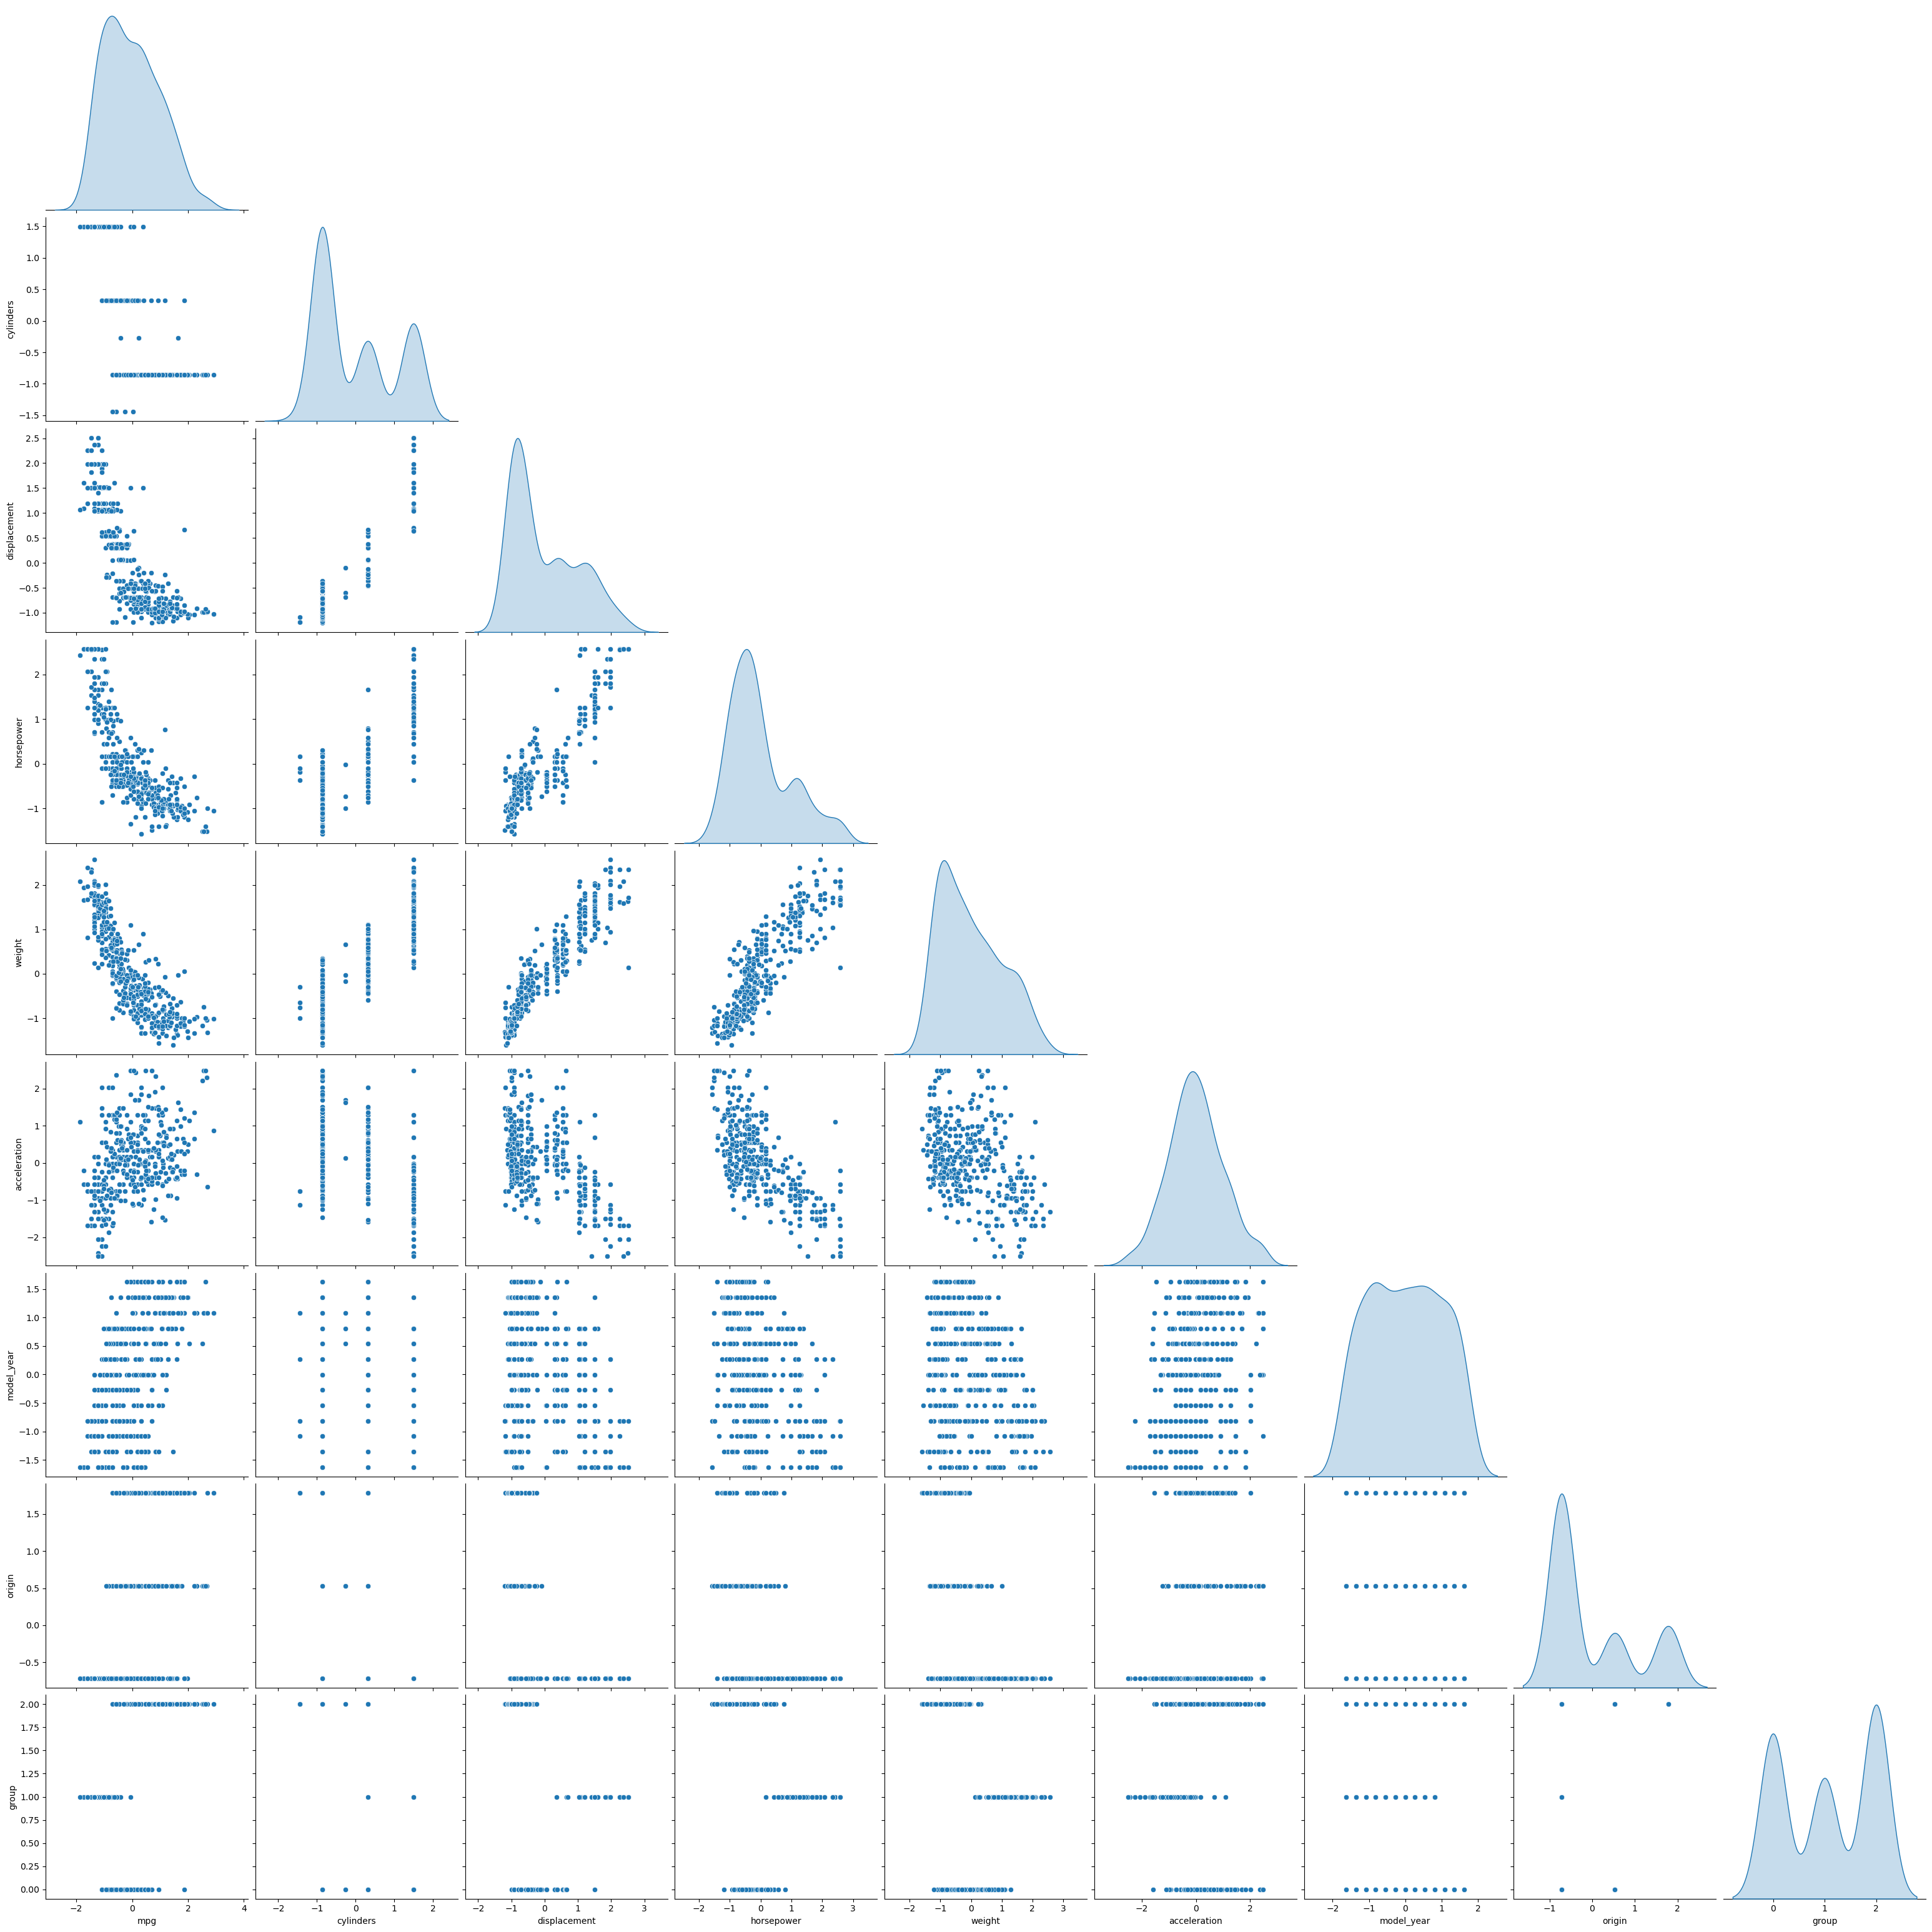

In [45]:
# Observing correlation between features using pair plot
plt.figure(figsize=(20,10))
sns.pairplot(car_data, corner=True, size=3.5, diag_kind='kde')
plt.show();

## 2. Data Preparation

### A. Split data into X and Y. [Train and Test optional]
### B. Standardize the Data.

In [46]:
X=vehicle_data.drop(columns='class', axis=1)
y=vehicle_data['class']

In [47]:
X_scaled=X.apply(zscore)
X_scaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.157152     0.514730              0.054727      0.266517   
1    -0.329831    -0.625168              0.118278     -0.843719   
2     1.252863     0.840415              1.516409      1.196714   
3    -0.086339    -0.625168             -0.008824     -0.303604   
4    -1.060304    -0.136640             -0.771441      1.076688   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.303199                 0.308150      -0.207926   
1             -0.596576                 0.091438      -0.599068   
2              0.543289                 0.308150       1.146029   
3              0.163334                 0.091438      -0.749507   
4              5.229401                 9.410074      -0.599068   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.140292               -0.225499                   0.756981   
1       0.524950               -0.611609                  -0.345396   
2      -1.141900                0.932830                   0.688082   
3       0.653169               -0.611609                  -0.345396   
4       0.524950               -0.611609                  -0.276497   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.406169          -0.346018                   0.285513   
1        -0.597250          -0.623680                  -0.512461   
2         1.090627           1.104622                   1.390401   
3        -0.915717          -0.742678                  -1.463892   
4         1.663868          -0.652013                   0.408279   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.321318       -0.073251          0.378360   
1                    -0.053340        0.537255          0.154650   
2                     0.080649        1.554765         -0.404624   
3                    -1.259241       -0.073251         -0.292769   
4                     7.316052        0.537255         -0.180914   

   skewness_about.2  hollows_ratio  
0         -0.320054       0.176431  
1          0.006222       0.446305  
2         -0.156916       0.041494  
3          1.637602       1.525801  
4         -1.462019      -1.712687

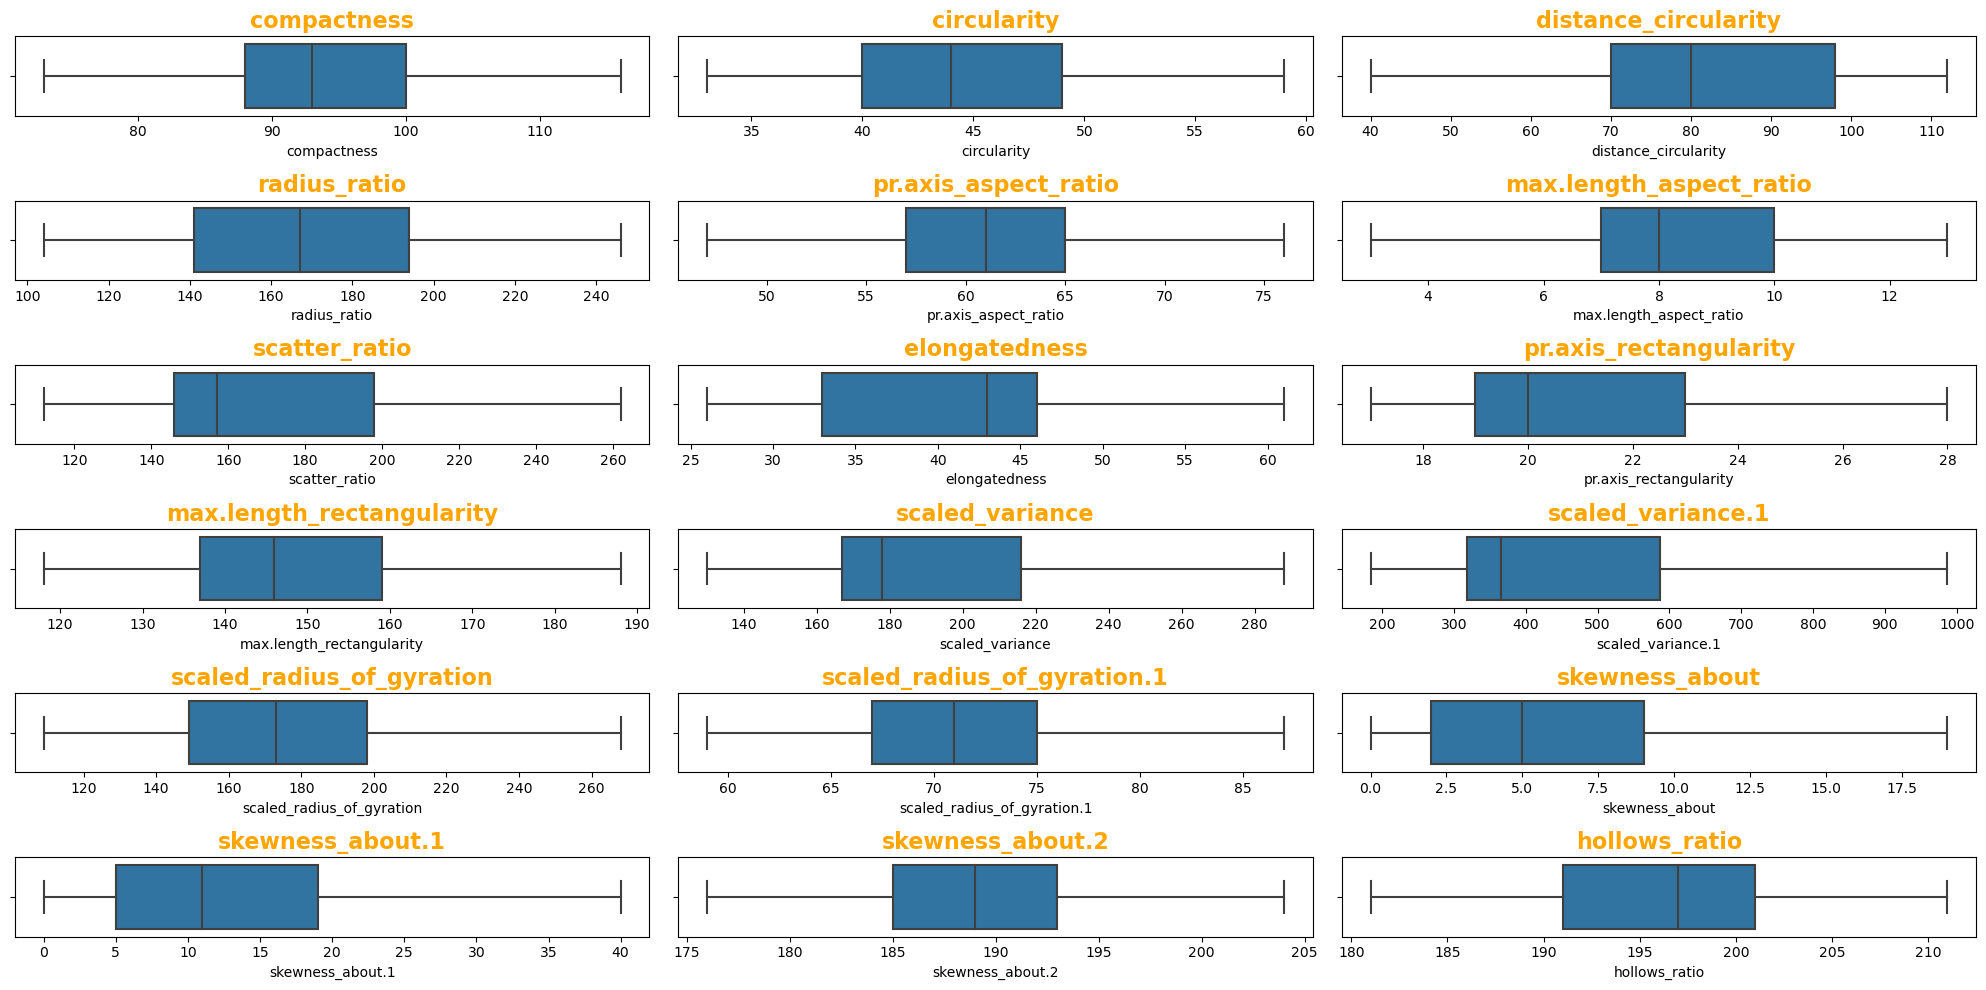

In [48]:
q1 = vehicle_data.quantile(0.25)
q3 = vehicle_data.quantile(0.75)
cut_off=1.5*(q3-q1)

vehicle_data_outlier=vehicle_data[~((vehicle_data < (q1 - cut_off)) |(vehicle_data > (q3 + cut_off))).any(axis=1)]

numerical_col=[i for i in vehicle_data_outlier.columns if is_numeric_dtype(vehicle_data_outlier[i])]
fig=plt.figure(figsize=(20,10))
for i in range(0,len(numerical_col)):
   ax=fig.add_subplot(6,3,i+1)
   sns.boxplot(data=vehicle_data_outlier, x=numerical_col[i])
   ax.set_title(numerical_col[i],color='orange',weight='bold',fontsize=16)
plt.tight_layout()
plt.show()

In [49]:
X_outlier = vehicle_data_outlier.drop(columns='class', axis=1)
y_outlier = vehicle_data_outlier['class']
X_outlier = X_outlier.apply(zscore)
X_outlier.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.168735     0.520814              0.051805      0.313447   
1    -0.328979    -0.623435              0.116192     -0.862501   
2     1.288593     0.847742              1.532708      1.298700   
3    -0.080122    -0.623435             -0.012582     -0.290418   
5     1.661879    -0.133043              1.532708      0.122753   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.916397                 0.912483      -0.210608   
1             -0.748265                 0.424777      -0.606722   
2              0.850532                 0.912483       1.160555   
3              0.317600                 0.424777      -0.759073   
5             -1.991775                -1.038343       2.623128   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.147862               -0.227776                   0.761671   
1       0.536905               -0.619221                  -0.343099   
2      -1.148949                0.946559                   0.692623   
3       0.666587               -0.619221                  -0.343099   
5      -1.927035                2.903783                   1.452152   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.398448          -0.349522                   0.297347   
1        -0.596230          -0.631226                  -0.504714   
2         1.150846           1.122235                   1.407893   
3        -0.925867          -0.751956                  -1.461017   
5         3.029776           2.973430                   2.765227   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.316555       -0.037406          0.376866   
1                     0.007437        0.608647          0.152941   
2                     0.169433        1.685401         -0.406871   
3                    -1.450527       -0.037406         -0.294908   
5                     2.113384       -0.252757         -0.406871   

   skewness_about.2  hollows_ratio  
0         -0.333384       0.168757  
1         -0.004891       0.442161  
2         -0.169138       0.032055  
3          1.637577       1.535776  
5         -1.318865      -1.745069

Splitting data into train and test. Keep 20% data reserved for testing.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)
X_train.shape, X_test.shape

((587, 18), (252, 18))

In [51]:
X_out_train, X_out_test, y_out_train, y_out_test = train_test_split(X_outlier, y_outlier, test_size=0.30, random_state=42, stratify=y_outlier)
X_out_train.shape, X_out_test.shape

((564, 18), (242, 18))

## Model Building

### A. Train a base Classification model using SVM.
### B. Print Classification metrics for train data.

Accuracy score Training dataset:0.98
Accuracy score Testing dataset:0.96
              precision    recall  f1-score   support

         bus       0.97      0.97      0.97        64
         car       0.98      0.97      0.98       128
         van       0.92      0.95      0.93        60

    accuracy                           0.96       252
   macro avg       0.96      0.96      0.96       252
weighted avg       0.96      0.96      0.96       252



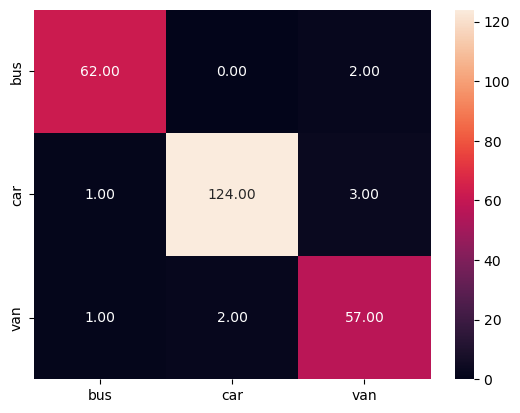

In [52]:
model_svm=SVC(random_state=42)
model_svm.fit(X_train, y_train)

y_svm_train_predict=model_svm.predict(X_train)
y_svm_test_predict=model_svm.predict(X_test)

print("Accuracy score Training dataset:{:.2f}".format(model_svm.score(X_train, y_train)))
print("Accuracy score Testing dataset:{:.2f}".format(model_svm.score(X_test, y_test)))

sns.heatmap(confusion_matrix(y_test, y_svm_test_predict), annot=True, fmt='.2f', xticklabels=['bus','car','van'], yticklabels=['bus','car','van'])
print(classification_report(y_test,y_svm_test_predict))

model_list= [['SVC', accuracy_score(y_train, y_svm_train_predict), accuracy_score(y_test, y_svm_test_predict), precision_score(y_test, y_svm_test_predict, average='weighted'), recall_score(y_test, y_svm_test_predict, average='weighted'),f1_score(y_test, y_svm_test_predict, average='weighted')]]

Accuracy score Training dataset:0.98
Accuracy score Testing dataset:0.97
              precision    recall  f1-score   support

         bus       0.98      0.95      0.97        61
         car       0.95      0.98      0.97       124
         van       0.98      0.95      0.96        57

    accuracy                           0.97       242
   macro avg       0.97      0.96      0.97       242
weighted avg       0.97      0.97      0.97       242



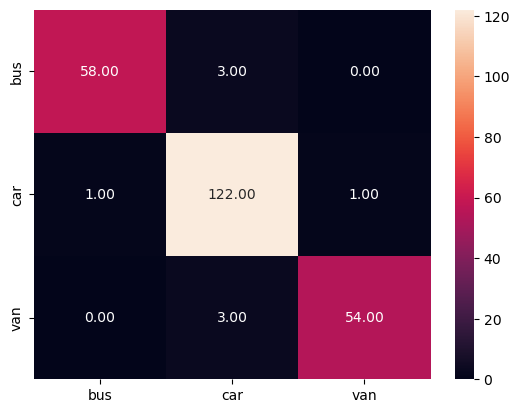

In [53]:
model_svm=SVC(random_state=42)
model_svm.fit(X_out_train, y_out_train)

y_svm_out_train_predict=model_svm.predict(X_out_train)
y_svm_out_test_predict=model_svm.predict(X_out_test)

print("Accuracy score Training dataset:{:.2f}".format(model_svm.score(X_out_train, y_out_train)))
print("Accuracy score Testing dataset:{:.2f}".format(model_svm.score(X_out_test, y_out_test)))

sns.heatmap(confusion_matrix(y_out_test, y_svm_out_test_predict), annot=True, fmt='.2f', xticklabels=['bus','car','van'], yticklabels=['bus','car','van'])
print(classification_report(y_out_test,y_svm_out_test_predict))

model_list.append(['SVC_NO_OUTLIER', accuracy_score(y_out_train, y_svm_out_train_predict), accuracy_score(y_out_test, y_svm_out_test_predict), precision_score(y_out_test, y_svm_out_test_predict, average='weighted'), recall_score(y_out_test, y_svm_out_test_predict, average='weighted'),f1_score(y_out_test, y_svm_out_test_predict, average='weighted')])

In [54]:
pd.DataFrame(model_list,columns=['Model','Train_Accuracy','Test_Accuracy','Precision','Recall','F1 Score']).sort_values(by=['Recall','F1 Score'], ascending=False)

Model  Train_Accuracy  Test_Accuracy  Precision    Recall  \
1  SVC_NO_OUTLIER         0.97695       0.966942   0.967427  0.966942   
0             SVC         0.97615       0.964286   0.964800  0.964286   

   F1 Score  
1  0.966919  
0  0.964452

### C. Apply PCA on the data with 10 components.
### D. Visualize Cumulative Variance Explained with Number of Components.
### E. Draw a horizontal line on the above plot to highlight the threshold of 90%.

In [55]:
pca10 = PCA(n_components=10, random_state=42, whiten=True)
pca10.fit(X_scaled)

PCA(n_components=10, random_state=42, whiten=True)

In [56]:
print(pca10.explained_variance_)

[9.40424389 3.0152232  1.90960561 1.18238123 0.91595098 0.54175798
 0.35999085 0.22370303 0.15998646 0.0921924 ]


In [57]:
print(pca10.components_)

[[ 0.27493265  0.29367875  0.30437701  0.26739067  0.07930483  0.09688422
   0.31751102 -0.31399395  0.31425429  0.28276356  0.30939406  0.31455488
   0.27219698 -0.01942018  0.0408814   0.05948253  0.0274544   0.07161317]
 [-0.12745155  0.12384787 -0.07574846 -0.18866284 -0.11846055  0.0125327
   0.046529    0.0142943   0.05961542  0.11480779  0.06095509  0.05191391
   0.20753261  0.48938586 -0.05531089 -0.12474618 -0.54159647 -0.54117069]
 [-0.11968789 -0.02527257 -0.05533572  0.27680528  0.64298766  0.59096462
  -0.09710819  0.05725449 -0.10977226 -0.01737759  0.05611158 -0.10885546
  -0.03200592  0.28468639 -0.11460826 -0.07412967  0.01151657  0.04229588]
 [ 0.07905419  0.18943381 -0.07053471 -0.04234661  0.03284857  0.03370836
  -0.09437995  0.0853353  -0.09212214  0.18982269 -0.1215348  -0.0906971
   0.20130886 -0.06786508  0.60623017 -0.66293156  0.10387694  0.04755495]
 [ 0.07100579 -0.08661172  0.0391886  -0.04460574 -0.0420314   0.21037251
  -0.01676542  0.07599973  0.0018494

In [58]:
print(pca10.explained_variance_ratio_)

[0.52183528 0.16731274 0.10596275 0.06560955 0.05082551 0.03006179
 0.01997565 0.01241313 0.00887754 0.0051157 ]


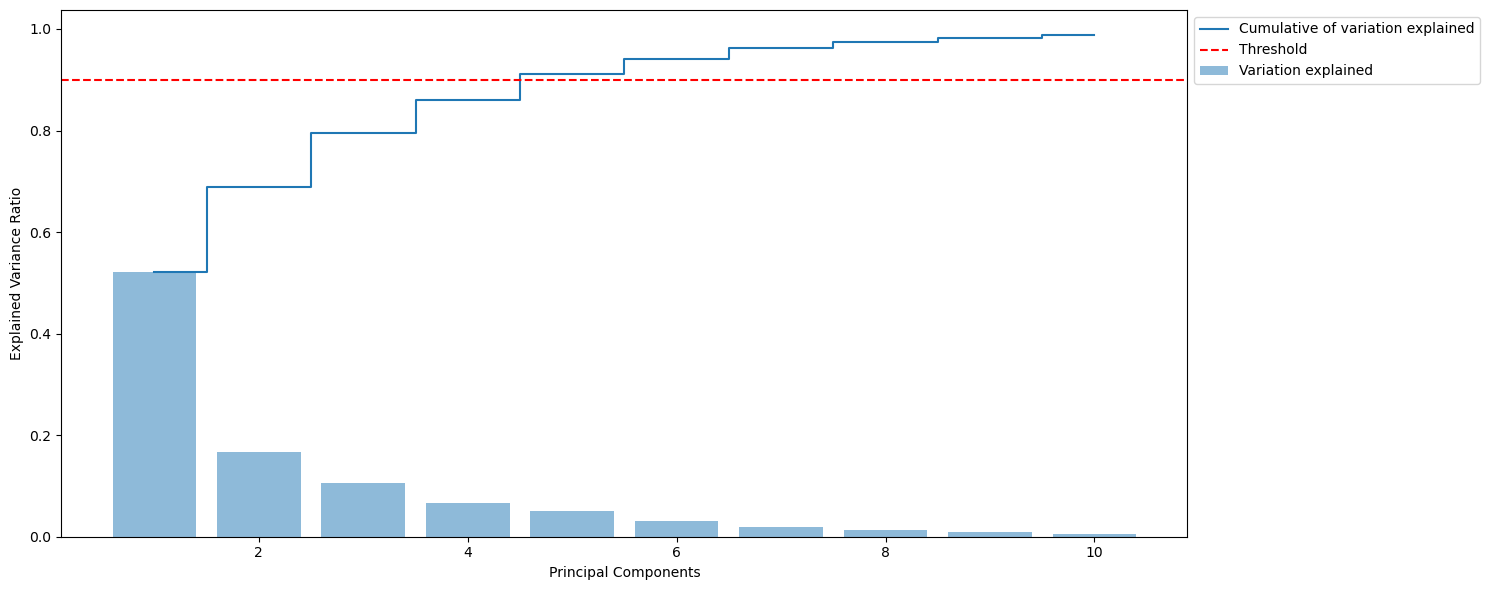

In [59]:
plt.figure(figsize=(15 , 6))
plt.bar(list(range(1,11)),pca10.explained_variance_ratio_,alpha=0.5, align='center', label='Variation explained')
plt.step(list(range(1,11)),np.cumsum(pca10.explained_variance_ratio_), where='mid', label='Cumulative of variation explained')
plt.axhline(0.9, c='r', linestyle = 'dashed', label = "Threshold")
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(bbox_to_anchor = (1.0, 1))
plt.tight_layout()
plt.show()

After visualizing above plot, threshold breakpoint at 90% of variance gives n_components as 5, but can increase variance % to more, to get better results.

### F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

As 90% isn't covering cumulative variance, will inc threshold.

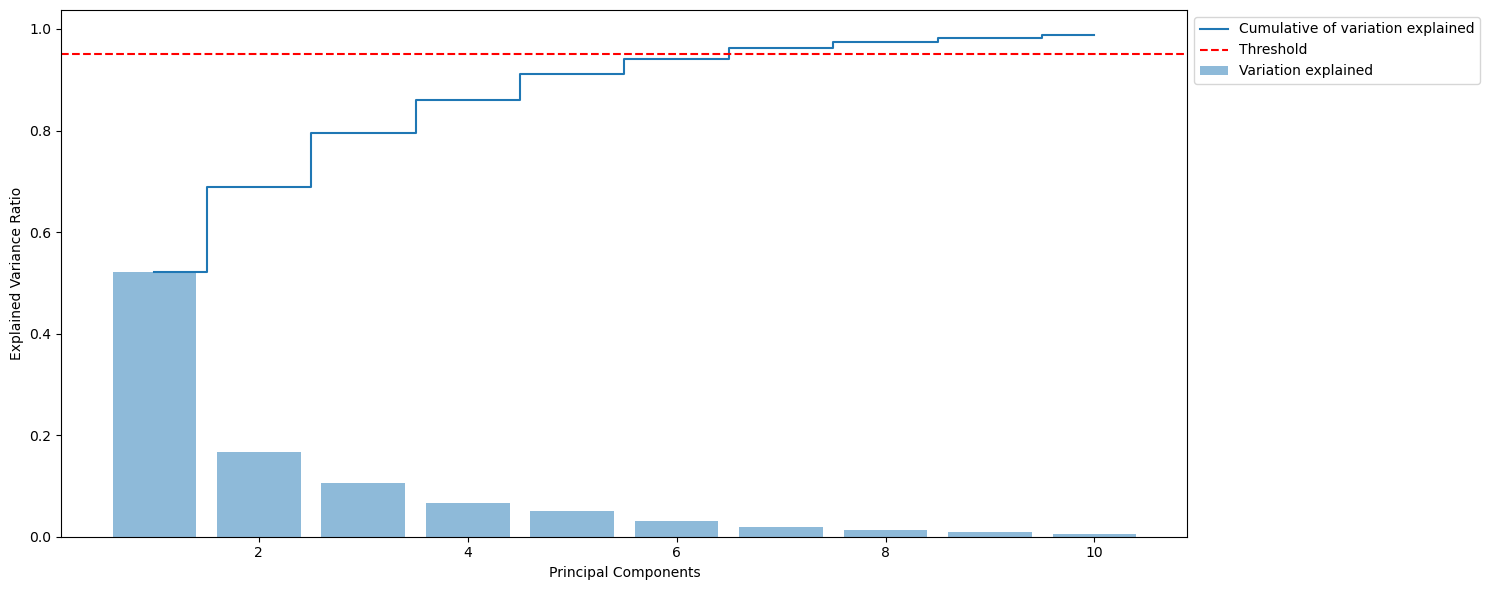

In [60]:
plt.figure(figsize=(15 , 6))
plt.bar(list(range(1,11)),pca10.explained_variance_ratio_,alpha=0.5, align='center', label='Variation explained')
plt.step(list(range(1,11)),np.cumsum(pca10.explained_variance_ratio_), where='mid', label='Cumulative of variation explained')
plt.axhline(0.95, c='r', linestyle = 'dashed', label = "Threshold")
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(bbox_to_anchor = (1.0, 1))
plt.tight_layout()
plt.show()

In [61]:
pca7 = PCA(n_components=7, random_state=42, whiten=True)
pca7.fit(X_scaled)
print(pca7.components_)
print(pca7.explained_variance_ratio_)
Xpca7 = pca7.transform(X_scaled)
Xpca7.shape

[[ 0.27493265  0.29367875  0.30437701  0.26739067  0.07930483  0.09688422
   0.31751102 -0.31399395  0.31425429  0.28276356  0.30939406  0.31455488
   0.27219698 -0.01942018  0.0408814   0.05948253  0.0274544   0.07161317]
 [-0.12745155  0.12384787 -0.07574846 -0.18866284 -0.11846055  0.0125327
   0.046529    0.0142943   0.05961542  0.11480779  0.06095509  0.05191391
   0.20753261  0.48938586 -0.05531089 -0.12474618 -0.54159647 -0.54117069]
 [-0.11968789 -0.02527257 -0.05533572  0.27680528  0.64298766  0.59096462
  -0.09710819  0.05725449 -0.10977226 -0.01737759  0.05611158 -0.10885546
  -0.03200592  0.28468639 -0.11460826 -0.07412967  0.01151657  0.04229588]
 [ 0.07905419  0.18943381 -0.07053471 -0.04234661  0.03284857  0.03370836
  -0.09437995  0.0853353  -0.09212214  0.18982269 -0.1215348  -0.0906971
   0.20130886 -0.06786508  0.60623017 -0.66293156  0.10387694  0.04755495]
 [ 0.07100579 -0.08661172  0.0391886  -0.04460574 -0.0420314   0.21037251
  -0.01676542  0.07599973  0.0018494

(839, 7)

In [62]:
pcaO7 = PCA(n_components=7, random_state=42, whiten=True)
pcaO7.fit(X_outlier)
print(pcaO7.components_)
print(pcaO7.explained_variance_ratio_)
XpcaO7 = pcaO7.transform(X_outlier)
XpcaO7.shape

[[ 0.2719284   0.28587019  0.30129483  0.27245064  0.09698256  0.19451345
   0.31098652 -0.3083419   0.30786679  0.27628293  0.30290776  0.30790519
   0.26172545 -0.04193894  0.03611455  0.06009015  0.03189933  0.08020061]
 [-0.08989386  0.13137531 -0.04667654 -0.20432744 -0.25751801 -0.09625011
   0.0710539  -0.01034599  0.08415502  0.1242721   0.06869121  0.07643517
   0.20813969  0.50455878 -0.01454146 -0.0932753  -0.50239954 -0.50763251]
 [-0.02345085 -0.21346227  0.06840786  0.04449389 -0.10620009 -0.15176651
   0.11208588 -0.09473803  0.11103258 -0.22404254  0.14877046  0.11505087
  -0.21386315  0.07232179 -0.52473694  0.67971718 -0.05795985 -0.04231211]
 [-0.1329386   0.02373861 -0.10825487  0.2541838   0.61503459 -0.31720699
   0.00879237 -0.07862207 -0.01831715 -0.06330021  0.0655263   0.01413101
   0.07634219  0.13380946 -0.47623771 -0.38607495  0.03360095 -0.10360775]
 [ 0.15077565 -0.1362279  -0.08151875  0.12106457  0.08673594 -0.6167827
   0.07837129 -0.07352757  0.074893

(806, 7)

Dataset has been trained with 7 features.

### G. Train SVM model on components selected from above step.
### H. Print Classification metrics for train data of above model and share insights.

In [63]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(Xpca7, y, test_size=0.30, random_state=42, stratify=y)
X_pca_train.shape, X_pca_test.shape

((587, 7), (252, 7))

In [64]:
X_pca_out_train, X_pca_out_test, y_pca_out_train, y_pca_out_test = train_test_split(XpcaO7, y_outlier, test_size=0.30, random_state=42, stratify=y_outlier)
X_pca_out_train.shape, X_pca_out_test.shape

((564, 7), (242, 7))

Accuracy score Training dataset:0.95
Accuracy score Testing dataset:0.90
              precision    recall  f1-score   support

         bus       0.89      0.92      0.91        64
         car       0.92      0.91      0.92       128
         van       0.86      0.85      0.86        60

    accuracy                           0.90       252
   macro avg       0.89      0.90      0.89       252
weighted avg       0.90      0.90      0.90       252



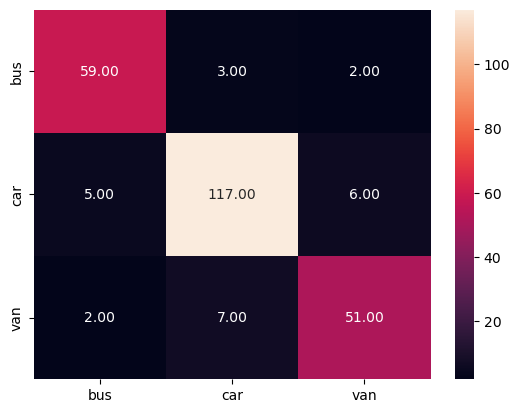

In [65]:
model_svm_pca=SVC(random_state=42)
model_svm_pca.fit(X_pca_train, y_pca_train)

y_svm_pca_train_predict=model_svm_pca.predict(X_pca_train)
y_svm_pca_test_predict=model_svm_pca.predict(X_pca_test)

print("Accuracy score Training dataset:{:.2f}".format(model_svm_pca.score(X_pca_train, y_pca_train)))
print("Accuracy score Testing dataset:{:.2f}".format(model_svm_pca.score(X_pca_test, y_pca_test)))

sns.heatmap(confusion_matrix(y_pca_test, y_svm_pca_test_predict), annot=True, fmt='.2f', xticklabels=['bus','car','van'], yticklabels=['bus','car','van'])
print(classification_report(y_pca_test,y_svm_pca_test_predict))

model_list.append(['SVC_PCA', accuracy_score(y_pca_train, y_svm_pca_train_predict), accuracy_score(y_pca_test, y_svm_pca_test_predict), precision_score(y_pca_test, y_svm_pca_test_predict, average='weighted'), recall_score(y_pca_test, y_svm_pca_test_predict, average='weighted'),f1_score(y_pca_test, y_svm_pca_test_predict, average='weighted')])

Accuracy score Training dataset:0.96
Accuracy score Testing dataset:0.94
              precision    recall  f1-score   support

         bus       0.95      0.93      0.94        61
         car       0.94      0.96      0.95       124
         van       0.93      0.91      0.92        57

    accuracy                           0.94       242
   macro avg       0.94      0.94      0.94       242
weighted avg       0.94      0.94      0.94       242



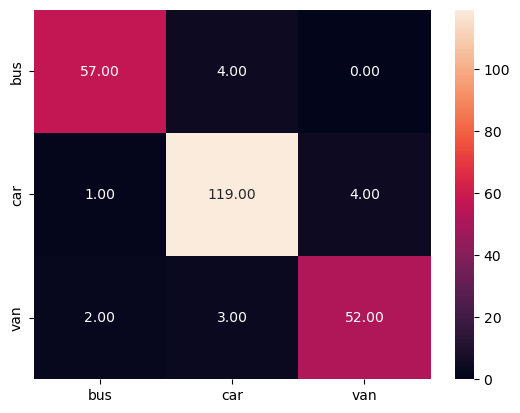

In [66]:
model_svm_pca=SVC(random_state=42)
model_svm_pca.fit(X_pca_out_train, y_pca_out_train)

y_svm_pca_out_train_predict=model_svm_pca.predict(X_pca_out_train)
y_svm_pca_out_test_predict=model_svm_pca.predict(X_pca_out_test)

print("Accuracy score Training dataset:{:.2f}".format(model_svm_pca.score(X_pca_out_train, y_pca_out_train)))
print("Accuracy score Testing dataset:{:.2f}".format(model_svm_pca.score(X_pca_out_test, y_pca_out_test)))

sns.heatmap(confusion_matrix(y_pca_out_test, y_svm_pca_out_test_predict), annot=True, fmt='.2f', xticklabels=['bus','car','van'], yticklabels=['bus','car','van'])
print(classification_report(y_pca_out_test,y_svm_pca_out_test_predict))

model_list.append(['SVC_PCA_NO_OUTLIER', accuracy_score(y_pca_out_train, y_svm_pca_out_train_predict), accuracy_score(y_pca_out_test, y_svm_pca_out_test_predict), precision_score(y_pca_out_test, y_svm_pca_out_test_predict, average='weighted'), recall_score(y_pca_out_test, y_svm_pca_out_test_predict, average='weighted'),f1_score(y_pca_out_test, y_svm_pca_out_test_predict, average='weighted')])

In [67]:
pd.DataFrame(model_list,columns=['Model','Train_Accuracy','Test_Accuracy','Precision','Recall','F1 Score']).sort_values(by=['Recall','F1 Score'], ascending=False)

Model  Train_Accuracy  Test_Accuracy  Precision    Recall  \
1      SVC_NO_OUTLIER        0.976950       0.966942   0.967427  0.966942   
0                 SVC        0.976150       0.964286   0.964800  0.964286   
3  SVC_PCA_NO_OUTLIER        0.962766       0.942149   0.942106  0.942149   
2             SVC_PCA        0.947189       0.900794   0.900785  0.900794   

   F1 Score  
1  0.966919  
0  0.964452  
3  0.942063  
2  0.900713

## 4. Performance Improvement

### A. Train another SVM on the components out of PCA. Tune the parameters to improve performance.
### B. Share best Parameters observed from above step.
### C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.

In [68]:
param_grid = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear','rbf']
}
grid_search = GridSearchCV(SVC(random_state=42), param_grid, refit=True, cv=5, verbose=1)

# fitting the model for grid search
grid_search.fit(X_pca_train, y_pca_train)

# print best parameter after tuning
print(grid_search.best_params_)

# print best fit model
print(grid_search.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1, random_state=42)


In [69]:
grid_search_out = GridSearchCV(SVC(random_state=42), param_grid, refit=True, cv=5, verbose=1)

# fitting the model for grid search
grid_search_out.fit(X_pca_out_train, y_pca_out_train)

# print best parameter after tuning
print(grid_search_out.best_params_)

# print best fit model
print(grid_search_out.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1, random_state=42)


Accuracy score Training dataset:0.97
Accuracy score Testing dataset:0.91
              precision    recall  f1-score   support

         bus       0.91      0.92      0.91        64
         car       0.93      0.91      0.92       128
         van       0.87      0.88      0.88        60

    accuracy                           0.91       252
   macro avg       0.90      0.91      0.90       252
weighted avg       0.91      0.91      0.91       252



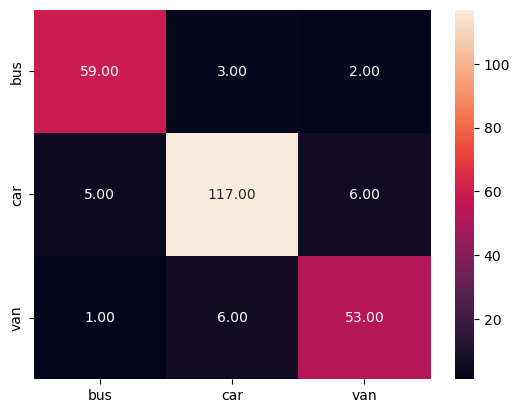

In [70]:
grid_search.best_estimator_.fit(X_pca_train, y_pca_train)

y_perf_test_pred = grid_search.best_estimator_.predict(X_pca_test)
y_perf_train_pred = grid_search.best_estimator_.predict(X_pca_train)

print("Accuracy score Training dataset:{:.2f}".format(grid_search.best_estimator_.score(X_pca_train, y_pca_train)))
print("Accuracy score Testing dataset:{:.2f}".format(grid_search.best_estimator_.score(X_pca_test, y_pca_test)))

sns.heatmap(confusion_matrix(y_pca_test, y_perf_test_pred), annot=True, fmt='.2f', xticklabels=['bus','car','van'], yticklabels=['bus','car','van'])
print(classification_report(y_pca_test,y_perf_test_pred))

model_list.append(['SVC_PCA_HP', accuracy_score(y_pca_train, y_perf_train_pred), accuracy_score(y_pca_test, y_perf_test_pred), precision_score(y_pca_test, y_perf_test_pred, average='weighted'), recall_score(y_pca_test, y_perf_test_pred, average='weighted'),f1_score(y_pca_test, y_perf_test_pred, average='weighted')])

Accuracy score Training dataset:0.97
Accuracy score Testing dataset:0.93
              precision    recall  f1-score   support

         bus       0.93      0.90      0.92        61
         car       0.93      0.95      0.94       124
         van       0.91      0.89      0.90        57

    accuracy                           0.93       242
   macro avg       0.92      0.92      0.92       242
weighted avg       0.93      0.93      0.93       242



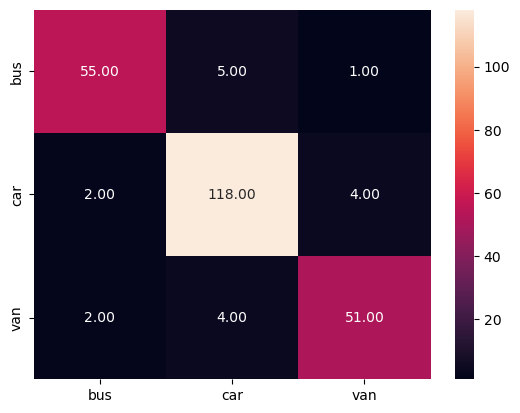

In [71]:
grid_search_out.best_estimator_.fit(X_pca_out_train, y_pca_out_train)

y_perf_out_test_pred = grid_search_out.best_estimator_.predict(X_pca_out_test)
y_perf_out_train_pred = grid_search_out.best_estimator_.predict(X_pca_out_train)

print("Accuracy score Training dataset:{:.2f}".format(grid_search_out.best_estimator_.score(X_pca_out_train, y_pca_out_train)))
print("Accuracy score Testing dataset:{:.2f}".format(grid_search_out.best_estimator_.score(X_pca_out_test, y_pca_out_test)))

sns.heatmap(confusion_matrix(y_pca_out_test, y_perf_out_test_pred), annot=True, fmt='.2f', xticklabels=['bus','car','van'], yticklabels=['bus','car','van'])
print(classification_report(y_pca_out_test,y_perf_out_test_pred))

model_list.append(['SVC_PCA_HP_NO_OUTLIER', accuracy_score(y_pca_out_train, y_perf_out_train_pred), accuracy_score(y_pca_out_test, y_perf_out_test_pred), precision_score(y_pca_out_test, y_perf_out_test_pred, average='weighted'), recall_score(y_pca_out_test, y_perf_out_test_pred, average='weighted'),f1_score(y_pca_out_test, y_perf_out_test_pred, average='weighted')])

In [72]:
pd.DataFrame(model_list,columns=['Model','Train_Accuracy','Test_Accuracy','Precision','Recall','F1 Score']).sort_values(by=['Recall','F1 Score'], ascending=False)

Model  Train_Accuracy  Test_Accuracy  Precision    Recall  \
1         SVC_NO_OUTLIER        0.976950       0.966942   0.967427  0.966942   
0                    SVC        0.976150       0.964286   0.964800  0.964286   
3     SVC_PCA_NO_OUTLIER        0.962766       0.942149   0.942106  0.942149   
5  SVC_PCA_HP_NO_OUTLIER        0.973404       0.925620   0.925569  0.925620   
4             SVC_PCA_HP        0.971039       0.908730   0.909050  0.908730   
2                SVC_PCA        0.947189       0.900794   0.900785  0.900794   

   F1 Score  
1  0.966919  
0  0.964452  
3  0.942063  
5  0.925445  
4  0.908833  
2  0.900713

Model has been trained with different combination of SVC with and without outliers.
Trained SVC model as basic model, PCA based model and at last tune PCA based model.

With decrease in features from 18 to 7, has little change in accuracy, so model trained with tuned hyperparameters with PCA can be used in production as of less complexity.

## 5. Data Understanding & Cleaning

### A. Explain pre-requisite/assumptions of PCA.

Pre-requisite/assumptions of PCA:
- Standardization of features. We can use zscore to have mean as 0 and SD as 1.
- Features need to have some correlation between them.
- Outliers removal or imputation is useful.
- Imputing all missing values with some correct approach.
- Removal of duplicate rows.

As in above dataset, pre-requisite performed:
- Imputed missing values which were present.
- Checked for duplicate rows.
- Trained model with both outliers and outliers removed.
- Using pairplot, just observed both positive/negative correlation.
- Before model training standardize dataset using zscore.

### B. Explain advantages and limitations of PCA.

Advantages of PCA:
- Increase algorithm performance and decrease complexity.
- Decrease dimensions, which will help in reducing overfitting of regression algos and less prone to variance errors.
- Removes correlated features using PCA after which features would be independent of one another.
- With reducing features, it reduces overfitting.
- With reducing features, it helps to visualize features more easily.

Limitations of PCS:
- Difficult to tell about which feature is important and which is not, means independent features are less interpretable.
- Due to dimensionality reduction, information loss is caused.
- Standardization of data need to be done to get optimal principal components.